In [1]:
import numpy as np   
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt   
import matplotlib.style
import warnings
warnings.filterwarnings("ignore")

In [2]:
xl = pd.read_excel("Election_Data.xlsx")
df= pd.read_excel("Election_Data.xlsx",'Election_Dataset_Two Classes')

In [3]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [4]:
df.isna().sum()

Unnamed: 0                 0
vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [5]:
df = df.drop('Unnamed: 0', axis=1)
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [6]:
df.columns

Index(['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'],
      dtype='object')

In [7]:
print("no. of rows: ",df.shape[0], "\n""no. of columns: ",df.shape[1])

no. of rows:  1525 
no. of columns:  9


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [9]:
cat=['economic.cond.national', 'economic.cond.household','Blair', 'Hague', 'Europe', 'political.knowledge']
for i in cat:
    df[i]=df[i].astype("object")
df.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   object
 3   economic.cond.household  1525 non-null   object
 4   Blair                    1525 non-null   object
 5   Hague                    1525 non-null   object
 6   Europe                   1525 non-null   object
 7   political.knowledge      1525 non-null   object
 8   gender                   1525 non-null   object
dtypes: int64(1), object(8)
memory usage: 107.4+ KB


In [10]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print('Categorical variables :-',cat) 
print('Numerical variables :-',num)

Categorical variables :- ['vote', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender']
Numerical variables :- ['age']


In [11]:
df[cat].describe().T

,count,unique,top,freq
vote,1525,2,Labour,1063
economic.cond.national,1525,5,3,607
economic.cond.household,1525,5,3,648
Blair,1525,5,4,836
Hague,1525,5,2,624
Europe,1525,11,11,338
political.knowledge,1525,4,2,782
gender,1525,2,female,812


In [12]:
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0


In [13]:
df["vote"].replace({"Conservative": 0, "Labour": 1}, inplace=True)

In [14]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

ECONOMIC.COND.NATIONAL :  5
1     37
5     82
2    257
4    542
3    607
Name: economic.cond.national, dtype: int64


ECONOMIC.COND.HOUSEHOLD :  5
1     65
5     92
2    280
4    440
3    648
Name: economic.cond.household, dtype: int64


BLAIR :  5
3      1
1     97
5    153
2    438
4    836
Name: Blair, dtype: int64


HAGUE :  5
3     37
5     73
1    233
4    558
2    624
Name: Hague, dtype: int64


EUROPE :  11
2      79
7      86
10    101
1     109
9     111
8     112
5     124
4     127
3     129
6     209
11    338
Name: Europe, dtype: int64


POLITICAL.KNOWLEDGE :  4
1     38
3    250
0    455
2    782
Name: political.knowledge, dtype: int64


GENDER :  2
male      713
female    812
Name: gender, dtype: int64




In [15]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [16]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 8


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,1,35,4,4,5,2,3,2,male
626,1,39,3,4,4,2,5,2,male
870,1,38,2,4,2,2,4,3,male
983,0,74,4,3,2,4,8,2,female
1154,0,53,3,4,2,2,6,0,female
1236,1,36,3,3,2,2,6,2,female
1244,1,29,4,4,4,2,2,2,female
1438,1,40,4,3,4,2,2,2,male


In [17]:
df=df.drop_duplicates()
df.shape

(1517, 9)

<AxesSubplot:xlabel='age'>

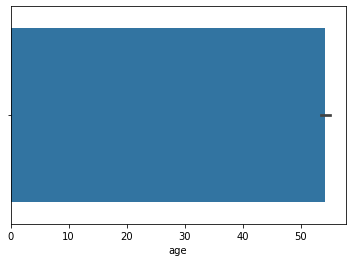

In [18]:
sns.barplot(df.age)

<AxesSubplot:>

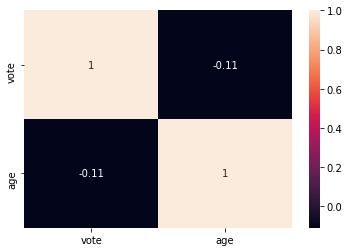

In [19]:
sns.heatmap(df.corr(),annot=True)

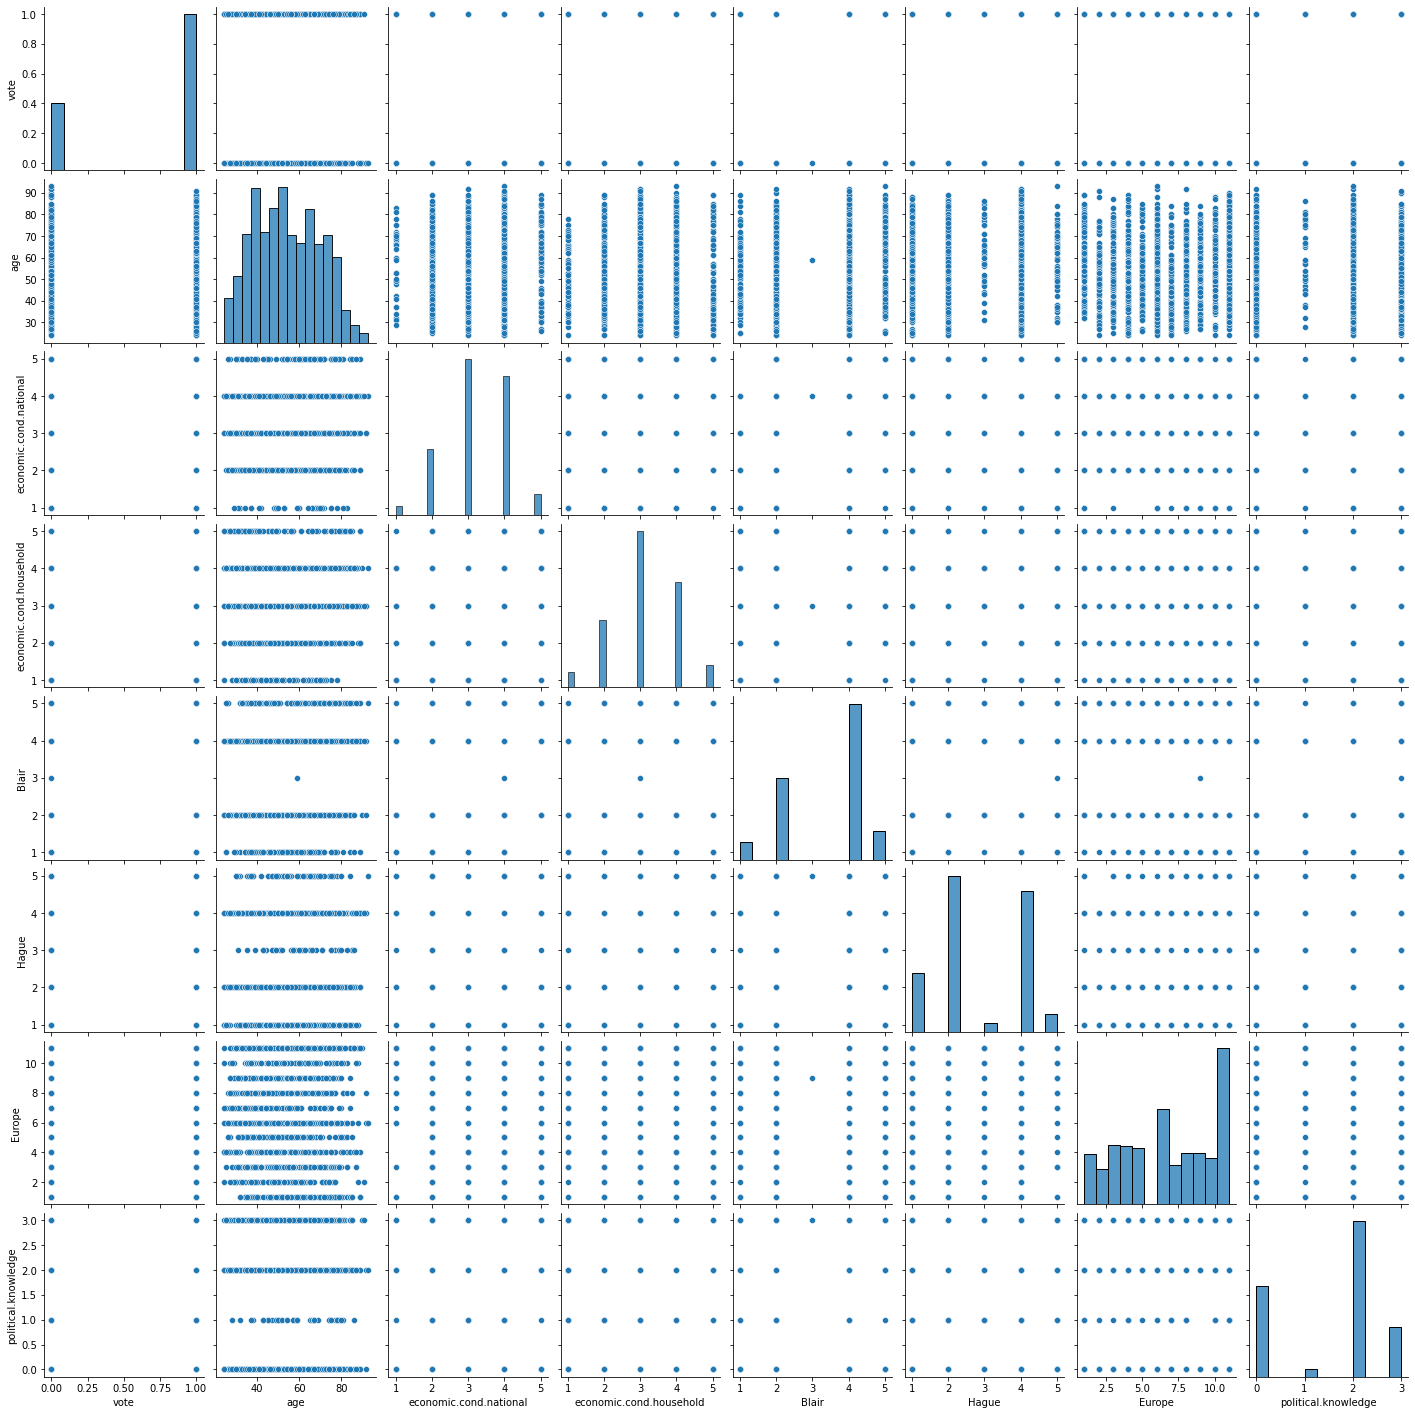

In [20]:
sns.pairplot(df)

<AxesSubplot:xlabel='age', ylabel='Density'>

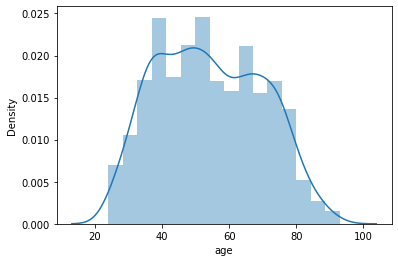

In [21]:
sns.distplot(df.age)

<AxesSubplot:xlabel='gender', ylabel='age'>

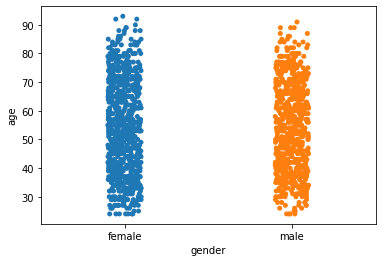

In [22]:
sns.stripplot(df.gender,df.age)

In [23]:
cat=['economic.cond.national',
 'economic.cond.household',
 'Blair',
 'Hague',
 'Europe',
 'political.knowledge',
 'gender']

In [24]:
df =pd.get_dummies(df, columns=cat,drop_first=True)
df.head()

,vote,age,economic.cond.national_2,economic.cond.national_3,economic.cond.national_4,economic.cond.national_5,economic.cond.household_2,economic.cond.household_3,economic.cond.household_4,economic.cond.household_5,...,Europe_6,Europe_7,Europe_8,Europe_9,Europe_10,Europe_11,political.knowledge_1,political.knowledge_2,political.knowledge_3,gender_male
0,1,43,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,36,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
2,1,35,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
3,1,24,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,41,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,1


<AxesSubplot:xlabel='age'>

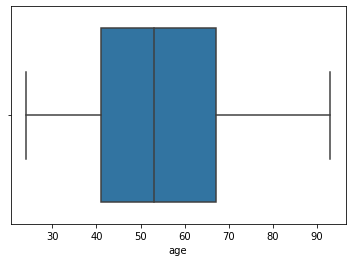

In [25]:
sns.boxplot(df.age)

In [26]:
df[num]= df[num].apply((lambda x:(x-x.min()) / (x.max()-x.min())))
df.sample(5)

,vote,age,economic.cond.national_2,economic.cond.national_3,economic.cond.national_4,economic.cond.national_5,economic.cond.household_2,economic.cond.household_3,economic.cond.household_4,economic.cond.household_5,...,Europe_6,Europe_7,Europe_8,Europe_9,Europe_10,Europe_11,political.knowledge_1,political.knowledge_2,political.knowledge_3,gender_male
446,0,0.608696,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
871,0,0.347826,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
711,0,0.739130,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
542,0,0.608696,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1279,1,0.318841,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1


In [27]:
df.columns

Index(['vote', 'age', 'economic.cond.national_2', 'economic.cond.national_3',
       'economic.cond.national_4', 'economic.cond.national_5',
       'economic.cond.household_2', 'economic.cond.household_3',
       'economic.cond.household_4', 'economic.cond.household_5', 'Blair_2',
       'Blair_3', 'Blair_4', 'Blair_5', 'Hague_2', 'Hague_3', 'Hague_4',
       'Hague_5', 'Europe_2', 'Europe_3', 'Europe_4', 'Europe_5', 'Europe_6',
       'Europe_7', 'Europe_8', 'Europe_9', 'Europe_10', 'Europe_11',
       'political.knowledge_1', 'political.knowledge_2',
       'political.knowledge_3', 'gender_male'],
      dtype='object')

In [28]:
X = df.drop('vote', axis=1)
Y = df['vote']

In [29]:
X.head()

,age,economic.cond.national_2,economic.cond.national_3,economic.cond.national_4,economic.cond.national_5,economic.cond.household_2,economic.cond.household_3,economic.cond.household_4,economic.cond.household_5,Blair_2,...,Europe_6,Europe_7,Europe_8,Europe_9,Europe_10,Europe_11,political.knowledge_1,political.knowledge_2,political.knowledge_3,gender_male
0,0.275362,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.173913,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
2,0.159420,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
3,0.000000,0,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0.246377,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1


In [30]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: vote, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.3 , random_state=1)

In [32]:
from sklearn import metrics,model_selection
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [33]:
print('TrainSet Target variable proportion:-\n',Ytrain.value_counts(1))
print('\nTestSet Target variable proportion:-\n',Ytest.value_counts(1))

TrainSet Target variable proportion:-
 1    0.71065
0    0.28935
Name: vote, dtype: float64

TestSet Target variable proportion:-
 1    0.664474
0    0.335526
Name: vote, dtype: float64


In [34]:
print('Number of rows and columns of the training set for the independent variables:',Xtrain.shape)
print('Number of rows and columns of the training set for the dependent variable:',Ytrain.shape)
print('Number of rows and columns of the test set for the independent variables:',Xtest.shape)
print('Number of rows and columns of the test set for the dependent variable:',Ytest.shape)

Number of rows and columns of the training set for the independent variables: (1061, 31)
Number of rows and columns of the training set for the dependent variable: (1061,)
Number of rows and columns of the test set for the independent variables: (456, 31)
Number of rows and columns of the test set for the dependent variable: (456,)


## Logistic Regression

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [36]:
#Method 1- Default Parameters
model = LogisticRegression()
model.fit(Xtrain, Ytrain)

LR_Ytrain_predict = model.predict(Xtrain)
LR_Ytest_predict = model.predict(Xtest)

print('Train Set Accuracy:-',model.score(Xtrain, Ytrain))
print('Test Set Accuracy:-',model.score(Xtest, Ytest))
print('\nConfusion Matrix for Train Set:-\n',confusion_matrix(Ytrain, LR_Ytrain_predict))
print('\nClassification Report for Train Set:-\n',classification_report(Ytrain, LR_Ytrain_predict))
print('\nConfusion Matrix for Test Set:-\n',confusion_matrix(Ytest, LR_Ytest_predict))
print('\nClassification Report for Test Set:-\n',classification_report(Ytest, LR_Ytest_predict))

Train Set Accuracy:- 0.8473138548539114
Test Set Accuracy:- 0.8245614035087719

Confusion Matrix for Train Set:-
 [[208  99]
 [ 63 691]]

Classification Report for Train Set:-
               precision    recall  f1-score   support

           0       0.77      0.68      0.72       307
           1       0.87      0.92      0.90       754

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.84      0.85      0.84      1061


Confusion Matrix for Test Set:-
 [[104  49]
 [ 31 272]]

Classification Report for Test Set:-
               precision    recall  f1-score   support

           0       0.77      0.68      0.72       153
           1       0.85      0.90      0.87       303

    accuracy                           0.82       456
   macro avg       0.81      0.79      0.80       456
weighted avg       0.82      0.82      0.82       456



AUC: 0.903


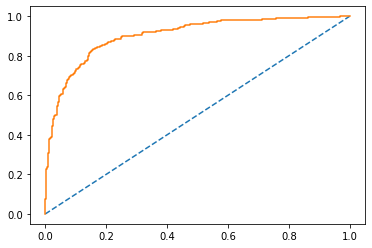

In [37]:
#AUC and ROC for train data wrt LR
probs = model.predict_proba(Xtrain)
probs = probs[:, 1]
LRbasic_train_auc = roc_auc_score(Ytrain, probs)
print('AUC: %.3f' % LRbasic_train_auc)
train_fpr, train_tpr, train_thresholds = roc_curve(Ytrain, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);

AUC: 0.873


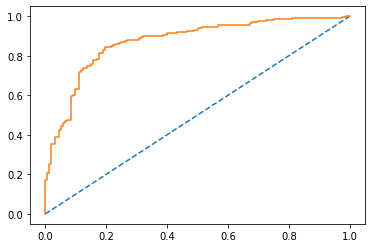

In [38]:
#AUC and ROC for test data wrt LR
probs = model.predict_proba(Xtest)
probs = probs[:, 1]
LRbasic_test_auc = roc_auc_score(Ytest, probs)
print('AUC: %.3f' % LRbasic_test_auc)
test_fpr, test_tpr, test_thresholds = roc_curve(Ytest, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);

In [39]:
# Logistic Regression [0]
lr_metrics1=classification_report(Ytrain, LR_Ytrain_predict,output_dict=True)
data1=pd.DataFrame(lr_metrics1).transpose()
lr_train_f1score0=round(data1.loc["0"][2],2)
lr_train_recall0=round(data1.loc["0"][1],2)
lr_train_precision0=round(data1.loc["0"][0],2)
print ('lr_train_precision ',lr_train_precision0)
print ('lr_train_recall ',lr_train_recall0)
print ('lr_train_f1 ',lr_train_f1score0)

lr_metrics2=classification_report(Ytest, LR_Ytest_predict,output_dict=True)
data2=pd.DataFrame(lr_metrics2).transpose()
lr_test_f1score0=round(data2.loc["0"][2],2)
lr_test_recall0=round(data2.loc["0"][1],2)
lr_test_precision0=round(data2.loc["0"][0],2)
print ('lr_test_precision ',lr_test_precision0)
print ('lr_test_recall ',lr_test_recall0)
print ('lr_test_f1 ',lr_test_f1score0)

# Logistic Regression [1]
lr_metrics3=classification_report(Ytrain, LR_Ytrain_predict,output_dict=True)
data3=pd.DataFrame(lr_metrics3).transpose()
lr_train_f1score1=round(data3.loc["1"][2],2)
lr_train_recall1=round(data3.loc["1"][1],2)
lr_train_precision1=round(data3.loc["1"][0],2)
print ('lr_train_precision ',lr_train_precision1)
print ('lr_train_recall ',lr_train_recall1)
print ('lr_train_f1 ',lr_train_f1score1)

lr_metrics4=classification_report(Ytest, LR_Ytest_predict,output_dict=True)
data4=pd.DataFrame(lr_metrics4).transpose()
lr_test_f1score1=round(data4.loc["1"][2],2)
lr_test_recall1=round(data4.loc["1"][1],2)
lr_test_precision1=round(data4.loc["1"][0],2)
print ('lr_test_precision ',lr_test_precision1)
print ('lr_test_recall ',lr_test_recall1)
print ('lr_test_f1 ',lr_test_f1score1)


lr_train_precision  0.77
lr_train_recall  0.68
lr_train_f1  0.72
lr_test_precision  0.77
lr_test_recall  0.68
lr_test_f1  0.72
lr_train_precision  0.87
lr_train_recall  0.92
lr_train_f1  0.9
lr_test_precision  0.85
lr_test_recall  0.9
lr_test_f1  0.87


## Logistic Regression Model Tuning 

In [40]:
#Method 2- Grid Search
grid={'penalty':['l2','none'],
      'solver':['liblinear','lbfgs','saga'],
      'tol':[0.0001,0.00001]}

LR = LogisticRegression(max_iter=1000,n_jobs=2)
grid_search = GridSearchCV(estimator = LR, param_grid = grid, cv = 3,scoring='f1')
grid_search.fit(Xtrain, Ytrain)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=1000, n_jobs=2),
             param_grid={'penalty': ['l2', 'none'],
                         'solver': ['liblinear', 'lbfgs', 'saga'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [41]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.0001} 

LogisticRegression(max_iter=1000, n_jobs=2)


In [42]:
bestmodel = grid_search.best_estimator_

In [43]:
LRM_Ytrain_predict = bestmodel.predict(Xtrain)
LRM_train_score = bestmodel.score(Xtrain, Ytrain)
print('Train Set Accuracy:',LRM_train_score)
print('Confusion Matrix:-\n',confusion_matrix(Ytrain, LRM_Ytrain_predict))
print('\nClassification Report:-\n',classification_report(Ytrain, LRM_Ytrain_predict))

Train Set Accuracy: 0.8473138548539114
Confusion Matrix:-
 [[208  99]
 [ 63 691]]

Classification Report:-
               precision    recall  f1-score   support

           0       0.77      0.68      0.72       307
           1       0.87      0.92      0.90       754

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.84      0.85      0.84      1061



AUC: 0.903


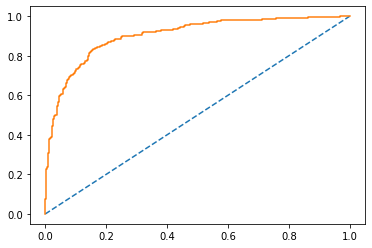

In [44]:
#AUC and ROC for train data wrt LRM
probs = bestmodel.predict_proba(Xtrain)
probs = probs[:, 1]
LR_train_auc = roc_auc_score(Ytrain, probs)
print('AUC: %.3f' % LR_train_auc)
train_fpr, train_tpr, train_thresholds = roc_curve(Ytrain, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);

In [45]:
LRM_Ytest_predict = bestmodel.predict(Xtest)
LRM_test_score = bestmodel.score(Xtest, Ytest)
print('Test Set Accuracy:',LRM_test_score)
print('Confusion Matrix:-\n',confusion_matrix(Ytest, LRM_Ytest_predict))
print('\nClassification Report:-\n',classification_report(Ytest, LRM_Ytest_predict))

Test Set Accuracy: 0.8245614035087719
Confusion Matrix:-
 [[104  49]
 [ 31 272]]

Classification Report:-
               precision    recall  f1-score   support

           0       0.77      0.68      0.72       153
           1       0.85      0.90      0.87       303

    accuracy                           0.82       456
   macro avg       0.81      0.79      0.80       456
weighted avg       0.82      0.82      0.82       456



AUC: 0.873


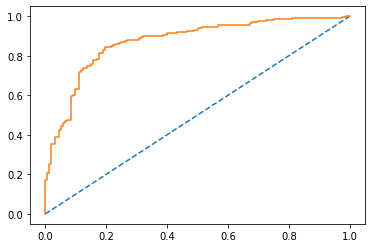

In [46]:
#AUC and ROC for test data wrt LRM
probs = bestmodel.predict_proba(Xtest)
probs = probs[:, 1]
LR_test_auc = roc_auc_score(Ytest, probs)
print('AUC: %.3f' % LR_test_auc)
test_fpr, test_tpr, test_thresholds = roc_curve(Ytest, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);

In [47]:
# Logistic Regression Model Tuned[0]
lrm_metrics1=classification_report(Ytrain, LRM_Ytrain_predict,output_dict=True)
data1=pd.DataFrame(lrm_metrics1).transpose()
lrm_train_f1score0=round(data1.loc["0"][2],2)
lrm_train_recall0=round(data1.loc["0"][1],2)
lrm_train_precision0=round(data1.loc["0"][0],2)
print ('lrm_train_precision ',lrm_train_precision0)
print ('lrm_train_recall ',lrm_train_recall0)
print ('lrm_train_f1 ',lrm_train_f1score0)

lrm_metrics2=classification_report(Ytest, LRM_Ytest_predict,output_dict=True)
data2=pd.DataFrame(lrm_metrics2).transpose()
lrm_test_f1score0=round(data2.loc["0"][2],2)
lrm_test_recall0=round(data2.loc["0"][1],2)
lrm_test_precision0=round(data2.loc["0"][0],2)
print ('lrm_test_precision ',lrm_test_precision0)
print ('lrm_test_recall ',lrm_test_recall0)
print ('lrm_test_f1 ',lrm_test_f1score0)

# Logistic Regression Model Tuned[1]
lrm_metrics3=classification_report(Ytrain, LRM_Ytrain_predict,output_dict=True)
data3=pd.DataFrame(lrm_metrics3).transpose()
lrm_train_f1score1=round(data3.loc["1"][2],2)
lrm_train_recall1=round(data3.loc["1"][1],2)
lrm_train_precision1=round(data3.loc["1"][0],2)
print ('lrm_train_precision ',lrm_train_precision1)
print ('lrm_train_recall ',lrm_train_recall1)
print ('lrm_train_f1 ',lrm_train_f1score1)

lrm_metrics4=classification_report(Ytest, LRM_Ytest_predict,output_dict=True)
data4=pd.DataFrame(lrm_metrics4).transpose()
lrm_test_f1score1=round(data4.loc["1"][2],2)
lrm_test_recall1=round(data4.loc["1"][1],2)
lrm_test_precision1=round(data4.loc["1"][0],2)
print ('lrm_test_precision ',lrm_test_precision1)
print ('lrm_test_recall ',lrm_test_recall1)
print ('lrm_test_f1 ',lrm_test_f1score1)


lrm_train_precision  0.77
lrm_train_recall  0.68
lrm_train_f1  0.72
lrm_test_precision  0.77
lrm_test_recall  0.68
lrm_test_f1  0.72
lrm_train_precision  0.87
lrm_train_recall  0.92
lrm_train_f1  0.9
lrm_test_precision  0.85
lrm_test_recall  0.9
lrm_test_f1  0.87


## LDA

In [48]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
ldamodel=lda.fit(Xtrain,Ytrain)

In [49]:
LDA_Ytrain_predict = ldamodel.predict(Xtrain)
LDA_train_score = ldamodel.score(Xtrain, Ytrain)
print('Train Set Accuracy:-',LDA_train_score)
print('\nConfusion Matrix for Train Set:-\n',confusion_matrix(Ytrain, LDA_Ytrain_predict))
print('\nClassification Report for Train Set:-\n',classification_report(Ytrain, LDA_Ytrain_predict))

Train Set Accuracy:- 0.8444863336475024

Confusion Matrix for Train Set:-
 [[216  91]
 [ 74 680]]

Classification Report for Train Set:-
               precision    recall  f1-score   support

           0       0.74      0.70      0.72       307
           1       0.88      0.90      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.80      0.81      1061
weighted avg       0.84      0.84      0.84      1061



AUC: 0.902


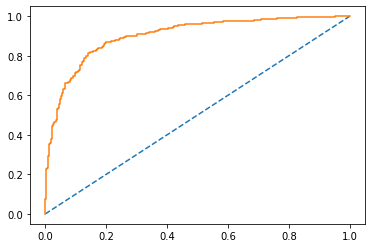

In [50]:
#AUC and ROC for train data wrt LDA
probs = ldamodel.predict_proba(Xtrain)
probs = probs[:, 1]
LDA_train_auc = roc_auc_score(Ytrain, probs)
print('AUC: %.3f' % LDA_train_auc)
train_fpr, train_tpr, train_thresholds = roc_curve(Ytrain, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);

In [51]:
LDA_Ytest_predict = ldamodel.predict(Xtest)
LDA_test_score = ldamodel.score(Xtest, Ytest)
print('Test Set Accuracy:-',LDA_test_score)
print('\nConfusion Matrix for Test Set:-\n',confusion_matrix(Ytest, LDA_Ytest_predict))
print('\nClassification Report for Test Set:-\n',classification_report(Ytest, LDA_Ytest_predict))

Test Set Accuracy:- 0.8201754385964912

Confusion Matrix for Test Set:-
 [[107  46]
 [ 36 267]]

Classification Report for Test Set:-
               precision    recall  f1-score   support

           0       0.75      0.70      0.72       153
           1       0.85      0.88      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.79      0.79       456
weighted avg       0.82      0.82      0.82       456



AUC: 0.877


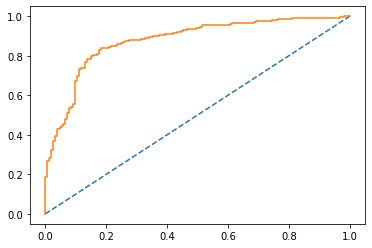

In [52]:
#AUC and ROC for test data wrt LDA
probs = ldamodel.predict_proba(Xtest)
probs = probs[:, 1]
LDA_test_auc = roc_auc_score(Ytest, probs)
print('AUC: %.3f' % LDA_test_auc)
test_fpr, test_tpr, test_thresholds = roc_curve(Ytest, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);

In [53]:
probs_train = ldamodel.predict_proba(Xtrain)
probs_train = probs_train[:, 1]

for j in np.arange(0.1,1,0.1):
    custom_prob = j 
    custom_cutoff_data=[]
    for i in range(0,len(Ytrain)):
        if np.array(probs_train)[i] > custom_prob:
            a=1
        else:
            a=0
        custom_cutoff_data.append(a)
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(Ytrain,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(Ytrain,custom_cutoff_data),4),'\n')

0.1 

Accuracy Score 0.7785
F1 Score 0.8636 

0.2 

Accuracy Score 0.8134
F1 Score 0.881 

0.3 

Accuracy Score 0.8351
F1 Score 0.892 

0.4 

Accuracy Score 0.8426
F1 Score 0.8941 

0.5 

Accuracy Score 0.8445
F1 Score 0.8918 

0.6 

Accuracy Score 0.8464
F1 Score 0.8902 

0.7 

Accuracy Score 0.8341
F1 Score 0.8774 

0.8 

Accuracy Score 0.8011
F1 Score 0.8465 

0.9 

Accuracy Score 0.7352
F1 Score 0.7782 



In [54]:
# LDA[0]
lda_metrics1=classification_report(Ytrain, LDA_Ytrain_predict,output_dict=True)
data1=pd.DataFrame(lda_metrics1).transpose()
lda_train_f1score0=round(data1.loc["0"][2],2)
lda_train_recall0=round(data1.loc["0"][1],2)
lda_train_precision0=round(data1.loc["0"][0],2)
print ('lda_train_precision ',lda_train_precision0)
print ('lda_train_recall ',lda_train_recall0)
print ('lda_train_f1 ',lda_train_f1score0)

lda_metrics2=classification_report(Ytest, LDA_Ytest_predict,output_dict=True)
data2=pd.DataFrame(lda_metrics2).transpose()
lda_test_f1score0=round(data2.loc["0"][2],2)
lda_test_recall0=round(data2.loc["0"][1],2)
lda_test_precision0=round(data2.loc["0"][0],2)
print ('lda_test_precision ',lda_test_precision0)
print ('lda_test_recall ',lda_test_recall0)
print ('lda_test_f1 ',lda_test_f1score0)

# LDA[1]
lda_metrics3=classification_report(Ytrain, LDA_Ytrain_predict,output_dict=True)
data3=pd.DataFrame(lda_metrics3).transpose()
lda_train_f1score1=round(data3.loc["1"][2],2)
lda_train_recall1=round(data3.loc["1"][1],2)
lda_train_precision1=round(data3.loc["1"][0],2)
print ('lda_train_precision ',lda_train_precision1)
print ('lda_train_recall ',lda_train_recall1)
print ('lda_train_f1 ',lda_train_f1score1)

lda_metrics4=classification_report(Ytest, LDA_Ytest_predict,output_dict=True)
data4=pd.DataFrame(lda_metrics4).transpose()
lda_test_f1score1=round(data4.loc["1"][2],2)
lda_test_recall1=round(data4.loc["1"][1],2)
lda_test_precision1=round(data4.loc["1"][0],2)
print ('lda_test_precision ',lda_test_precision1)
print ('lda_test_recall ',lda_test_recall1)
print ('lda_test_f1 ',lda_test_f1score1)


lda_train_precision  0.74
lda_train_recall  0.7
lda_train_f1  0.72
lda_test_precision  0.75
lda_test_recall  0.7
lda_test_f1  0.72
lda_train_precision  0.88
lda_train_recall  0.9
lda_train_f1  0.89
lda_test_precision  0.85
lda_test_recall  0.88
lda_test_f1  0.87


## LDA Model Tuning

In [55]:
#Method 2- Grid Search
lda_param_grid = {"solver" : ["svd"],
              "tol" : [0.0001,0.0002,0.0003]}

LDA = LinearDiscriminantAnalysis()
gridLDA = GridSearchCV(LDA, param_grid = lda_param_grid, cv=3,scoring="accuracy", n_jobs= 4, verbose = 1)
gridLDA.fit(Xtrain, Ytrain)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


GridSearchCV(cv=3, estimator=LinearDiscriminantAnalysis(), n_jobs=4,
             param_grid={'solver': ['svd'], 'tol': [0.0001, 0.0002, 0.0003]},
             scoring='accuracy', verbose=1)

In [56]:
print(gridLDA.best_params_,'\n')
print(gridLDA.best_estimator_)

{'solver': 'svd', 'tol': 0.0001} 

LinearDiscriminantAnalysis()


In [57]:
bestmodelLDA = gridLDA.best_estimator_

In [58]:
LDAM_Ytrain_predict = bestmodelLDA.predict(Xtrain)
LDAM_train_score = bestmodelLDA.score(Xtrain, Ytrain)
print('Train Set Accuracy:',LDAM_train_score)
print('Confusion Matrix:-\n',confusion_matrix(Ytrain, LDAM_Ytrain_predict))
print('\nClassification Report:-\n',classification_report(Ytrain, LDAM_Ytrain_predict))

Train Set Accuracy: 0.8444863336475024
Confusion Matrix:-
 [[216  91]
 [ 74 680]]

Classification Report:-
               precision    recall  f1-score   support

           0       0.74      0.70      0.72       307
           1       0.88      0.90      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.80      0.81      1061
weighted avg       0.84      0.84      0.84      1061



AUC: 0.902


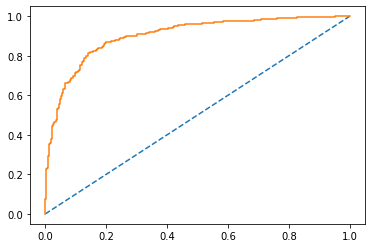

In [59]:
#AUC and ROC for train data wrt LDA-M
probs = bestmodelLDA.predict_proba(Xtrain)
probs = probs[:, 1]
LDAM_train_auc = roc_auc_score(Ytrain, probs)
print('AUC: %.3f' % LDAM_train_auc)
train_fpr, train_tpr, train_thresholds = roc_curve(Ytrain, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);

In [60]:
LDAM_Ytest_predict = bestmodelLDA.predict(Xtest)
LDAM_test_score = bestmodelLDA.score(Xtest, Ytest)
print('Test Set Accuracy:',LDAM_test_score)
print('Confusion Matrix:-\n',confusion_matrix(Ytest, LDAM_Ytest_predict))
print('\nClassification Report:-\n',classification_report(Ytest, LDAM_Ytest_predict))

Test Set Accuracy: 0.8201754385964912
Confusion Matrix:-
 [[107  46]
 [ 36 267]]

Classification Report:-
               precision    recall  f1-score   support

           0       0.75      0.70      0.72       153
           1       0.85      0.88      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.79      0.79       456
weighted avg       0.82      0.82      0.82       456



AUC: 0.877


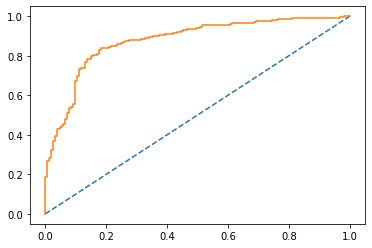

In [61]:
#AUC and ROC for test data wrt LDA-M
probs = bestmodelLDA.predict_proba(Xtest)
probs = probs[:, 1]
LDAM_test_auc = roc_auc_score(Ytest, probs)
print('AUC: %.3f' % LDAM_test_auc)
test_fpr, test_tpr, test_thresholds = roc_curve(Ytest, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);

In [62]:
# LDAM[0]
LDAM_metrics1=classification_report(Ytrain, LDAM_Ytrain_predict,output_dict=True)
data1=pd.DataFrame(LDAM_metrics1).transpose()
LDAM_train_f1score0=round(data1.loc["0"][2],2)
LDAM_train_recall0=round(data1.loc["0"][1],2)
LDAM_train_precision0=round(data1.loc["0"][0],2)
print ('LDAM_train_precision ',LDAM_train_precision0)
print ('LDAM_train_recall ',LDAM_train_recall0)
print ('LDAM_train_f1 ',LDAM_train_f1score0)

LDAM_metrics2=classification_report(Ytest, LDAM_Ytest_predict,output_dict=True)
data2=pd.DataFrame(LDAM_metrics2).transpose()
LDAM_test_f1score0=round(data2.loc["0"][2],2)
LDAM_test_recall0=round(data2.loc["0"][1],2)
LDAM_test_precision0=round(data2.loc["0"][0],2)
print ('LDAM_test_precision ',LDAM_test_precision0)
print ('LDAM_test_recall ',LDAM_test_recall0)
print ('LDAM_test_f1 ',LDAM_test_f1score0)

# LDAM[1]
LDAM_metrics3=classification_report(Ytrain, LDAM_Ytrain_predict,output_dict=True)
data3=pd.DataFrame(LDAM_metrics3).transpose()
LDAM_train_f1score1=round(data3.loc["1"][2],2)
LDAM_train_recall1=round(data3.loc["1"][1],2)
LDAM_train_precision1=round(data3.loc["1"][0],2)
print ('LDAM_train_precision ',LDAM_train_precision1)
print ('LDAM_train_recall ',LDAM_train_recall1)
print ('LDAM_train_f1 ',LDAM_train_f1score1)

LDAM_metrics4=classification_report(Ytest, LDAM_Ytest_predict,output_dict=True)
data4=pd.DataFrame(LDAM_metrics4).transpose()
LDAM_test_f1score1=round(data4.loc["1"][2],2)
LDAM_test_recall1=round(data4.loc["1"][1],2)
LDAM_test_precision1=round(data4.loc["1"][0],2)
print ('LDAM_test_precision ',LDAM_test_precision1)
print ('LDAM_test_recall ',LDAM_test_recall1)
print ('LDAM_test_f1 ',LDAM_test_f1score1)


LDAM_train_precision  0.74
LDAM_train_recall  0.7
LDAM_train_f1  0.72
LDAM_test_precision  0.75
LDAM_test_recall  0.7
LDAM_test_f1  0.72
LDAM_train_precision  0.88
LDAM_train_recall  0.9
LDAM_train_f1  0.89
LDAM_test_precision  0.85
LDAM_test_recall  0.88
LDAM_test_f1  0.87


## KNN Model

In [63]:
from sklearn.neighbors import KNeighborsClassifier

KNN=KNeighborsClassifier()
KNN.fit(Xtrain,Ytrain)

KNeighborsClassifier()

In [64]:
#Performance on Train Dataset wrt KNN
KNN_Ytrain_predict = KNN.predict(Xtrain)
KNN_train_score = KNN.score(Xtrain, Ytrain)
print('Train Data Accuracy:-',KNN_train_score)
print('\nConfusion Matrix:-\n',metrics.confusion_matrix(Ytrain, KNN_Ytrain_predict))
print('\nClassification Report:-\n',metrics.classification_report(Ytrain, KNN_Ytrain_predict))

Train Data Accuracy:- 0.8501413760603205

Confusion Matrix:-
 [[212  95]
 [ 64 690]]

Classification Report:-
               precision    recall  f1-score   support

           0       0.77      0.69      0.73       307
           1       0.88      0.92      0.90       754

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061



AUC: 0.924


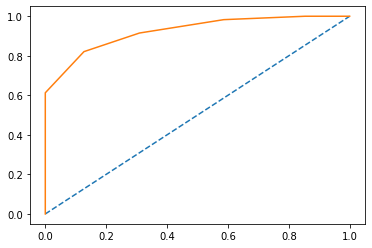

In [65]:
#AUC and ROC for train data wrt KNN
probs = KNN.predict_proba(Xtrain)
probs = probs[:, 1]
KNN_train_auc = roc_auc_score(Ytrain, probs)
print('AUC: %.3f' % KNN_train_auc)
train_fpr, train_tpr, train_thresholds = roc_curve(Ytrain, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);

In [66]:
#Performance on Test Dataset wrt KNN
KNN_Ytest_predict = KNN.predict(Xtest)
KNN_test_score = KNN.score(Xtest, Ytest)
print('Test Data Accuracy:-',KNN_test_score)
print('\nConfusion Matrix:-\n',metrics.confusion_matrix(Ytest, KNN_Ytest_predict))
print('\nClassification Report:-\n',metrics.classification_report(Ytest, KNN_Ytest_predict))

Test Data Accuracy:- 0.7828947368421053

Confusion Matrix:-
 [[ 91  62]
 [ 37 266]]

Classification Report:-
               precision    recall  f1-score   support

           0       0.71      0.59      0.65       153
           1       0.81      0.88      0.84       303

    accuracy                           0.78       456
   macro avg       0.76      0.74      0.75       456
weighted avg       0.78      0.78      0.78       456



AUC: 0.823


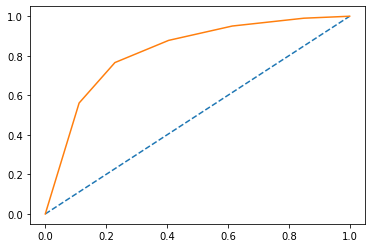

In [67]:
#AUC and ROC for test data wrt KNN
probs = KNN.predict_proba(Xtest)
probs = probs[:, 1]
KNN_test_auc = roc_auc_score(Ytest, probs)
print('AUC: %.3f' % KNN_test_auc)
test_fpr, test_tpr, test_thresholds = roc_curve(Ytest, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);

In [68]:
# knn[0]
knn_metrics1=classification_report(Ytrain, KNN_Ytrain_predict,output_dict=True)
data1=pd.DataFrame(knn_metrics1).transpose()
knn_train_f1score0=round(data1.loc["0"][2],2)
knn_train_recall0=round(data1.loc["0"][1],2)
knn_train_precision0=round(data1.loc["0"][0],2)
print ('knn_train_precision ',knn_train_precision0)
print ('knn_train_recall ',knn_train_recall0)
print ('knn_train_f1 ',knn_train_f1score0)

knn_metrics2=classification_report(Ytest, KNN_Ytest_predict,output_dict=True)
data2=pd.DataFrame(knn_metrics2).transpose()
knn_test_f1score0=round(data2.loc["0"][2],2)
knn_test_recall0=round(data2.loc["0"][1],2)
knn_test_precision0=round(data2.loc["0"][0],2)
print ('knn_test_precision ',knn_test_precision0)
print ('knn_test_recall ',knn_test_recall0)
print ('knn_test_f1 ',knn_test_f1score0)

# knn[1]
knn_metrics3=classification_report(Ytrain, KNN_Ytrain_predict,output_dict=True)
data3=pd.DataFrame(knn_metrics3).transpose()
knn_train_f1score1=round(data3.loc["1"][2],2)
knn_train_recall1=round(data3.loc["1"][1],2)
knn_train_precision1=round(data3.loc["1"][0],2)
print ('knn_train_precision ',knn_train_precision1)
print ('knn_train_recall ',knn_train_recall1)
print ('knn_train_f1 ',knn_train_f1score1)

knn_metrics4=classification_report(Ytest, KNN_Ytest_predict,output_dict=True)
data4=pd.DataFrame(knn_metrics4).transpose()
knn_test_f1score1=round(data4.loc["1"][2],2)
knn_test_recall1=round(data4.loc["1"][1],2)
knn_test_precision1=round(data4.loc["1"][0],2)
print ('knn_test_precision ',knn_test_precision1)
print ('knn_test_recall ',knn_test_recall1)
print ('knn_test_f1 ',knn_test_f1score1)


knn_train_precision  0.77
knn_train_recall  0.69
knn_train_f1  0.73
knn_test_precision  0.71
knn_test_recall  0.59
knn_test_f1  0.65
knn_train_precision  0.88
knn_train_recall  0.92
knn_train_f1  0.9
knn_test_precision  0.81
knn_test_recall  0.88
knn_test_f1  0.84


## Model Tuning on KNN

In [69]:
KNN = KNeighborsClassifier(n_jobs=-1)
params = {'n_neighbors':[3,5,7,9],
          'leaf_size':[5,10,15],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}
gridKNN = GridSearchCV(KNN, param_grid=params, n_jobs=1)
gridKNN.fit(Xtrain,Ytrain)

GridSearchCV(estimator=KNeighborsClassifier(n_jobs=-1), n_jobs=1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [5, 10, 15], 'n_jobs': [-1],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']})

In [70]:
print(gridKNN.best_params_,'\n')
print(gridKNN.best_estimator_)

{'algorithm': 'ball_tree', 'leaf_size': 10, 'n_jobs': -1, 'n_neighbors': 9, 'weights': 'uniform'} 

KNeighborsClassifier(algorithm='ball_tree', leaf_size=10, n_jobs=-1,
                     n_neighbors=9)


In [71]:
bestmodelKNN = gridKNN.best_estimator_

In [72]:
KNNM_Ytrain_predict = bestmodelKNN.predict(Xtrain)
KNNM_train_score = bestmodelKNN.score(Xtrain, Ytrain)
print('Train Set Accuracy:',KNNM_train_score)
print('Confusion Matrix:-\n',confusion_matrix(Ytrain, KNNM_Ytrain_predict))
print('\nClassification Report:-\n',classification_report(Ytrain, KNNM_Ytrain_predict))

Train Set Accuracy: 0.8388312912346843
Confusion Matrix:-
 [[201 106]
 [ 65 689]]

Classification Report:-
               precision    recall  f1-score   support

           0       0.76      0.65      0.70       307
           1       0.87      0.91      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.78      0.80      1061
weighted avg       0.83      0.84      0.84      1061



AUC: 0.905


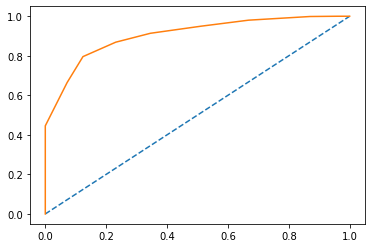

In [73]:
#AUC and ROC for train data wrt KNN-M
probs = bestmodelKNN.predict_proba(Xtrain)
probs = probs[:, 1]
KNNM_train_auc = roc_auc_score(Ytrain, probs)
print('AUC: %.3f' % KNNM_train_auc)
train_fpr, train_tpr, train_thresholds = roc_curve(Ytrain, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);

In [74]:
KNNM_Ytest_predict = bestmodelKNN.predict(Xtest)
KNNM_test_score = bestmodelKNN.score(Xtest, Ytest)
print('Test Set Accuracy:',KNNM_test_score)
print('Confusion Matrix:-\n',confusion_matrix(Ytest, KNNM_Ytest_predict))
print('\nClassification Report:-\n',classification_report(Ytest, KNNM_Ytest_predict))

Test Set Accuracy: 0.7675438596491229
Confusion Matrix:-
 [[ 86  67]
 [ 39 264]]

Classification Report:-
               precision    recall  f1-score   support

           0       0.69      0.56      0.62       153
           1       0.80      0.87      0.83       303

    accuracy                           0.77       456
   macro avg       0.74      0.72      0.73       456
weighted avg       0.76      0.77      0.76       456



AUC: 0.837


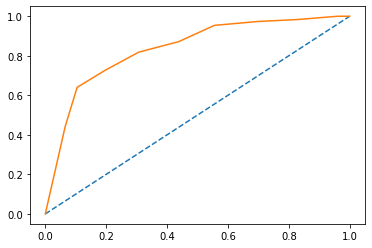

In [75]:
#AUC and ROC for test data wrt KNN-M
probs = bestmodelKNN.predict_proba(Xtest)
probs = probs[:, 1]
KNNM_test_auc = roc_auc_score(Ytest, probs)
print('AUC: %.3f' % KNNM_test_auc)
test_fpr, test_tpr, test_thresholds = roc_curve(Ytest, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);

In [76]:
# KNNM[0]
KNNM_metrics1=classification_report(Ytrain, KNNM_Ytrain_predict,output_dict=True)
data1=pd.DataFrame(KNNM_metrics1).transpose()
KNNM_train_f1score0=round(data1.loc["0"][2],2)
KNNM_train_recall0=round(data1.loc["0"][1],2)
KNNM_train_precision0=round(data1.loc["0"][0],2)
print ('KNNM_train_precision ',KNNM_train_precision0)
print ('KNNM_train_recall ',KNNM_train_recall0)
print ('KNNM_train_f1 ',KNNM_train_f1score0)

KNNM_metrics2=classification_report(Ytest, KNNM_Ytest_predict,output_dict=True)
data2=pd.DataFrame(KNNM_metrics2).transpose()
KNNM_test_f1score0=round(data2.loc["0"][2],2)
KNNM_test_recall0=round(data2.loc["0"][1],2)
KNNM_test_precision0=round(data2.loc["0"][0],2)
print ('KNNM_test_precision ',KNNM_test_precision0)
print ('KNNM_test_recall ',KNNM_test_recall0)
print ('KNNM_test_f1 ',KNNM_test_f1score0)

# KNNM[1]
KNNM_metrics3=classification_report(Ytrain, KNNM_Ytrain_predict,output_dict=True)
data3=pd.DataFrame(KNNM_metrics3).transpose()
KNNM_train_f1score1=round(data3.loc["1"][2],2)
KNNM_train_recall1=round(data3.loc["1"][1],2)
KNNM_train_precision1=round(data3.loc["1"][0],2)
print ('KNNM_train_precision ',KNNM_train_precision1)
print ('KNNM_train_recall ',KNNM_train_recall1)
print ('KNNM_train_f1 ',KNNM_train_f1score1)

KNNM_metrics4=classification_report(Ytest, KNNM_Ytest_predict,output_dict=True)
data4=pd.DataFrame(KNNM_metrics4).transpose()
KNNM_test_f1score1=round(data4.loc["1"][2],2)
KNNM_test_recall1=round(data4.loc["1"][1],2)
KNNM_test_precision1=round(data4.loc["1"][0],2)
print ('KNNM_test_precision ',KNNM_test_precision1)
print ('KNNM_test_recall ',KNNM_test_recall1)
print ('KNNM_test_f1 ',KNNM_test_f1score1)


KNNM_train_precision  0.76
KNNM_train_recall  0.65
KNNM_train_f1  0.7
KNNM_test_precision  0.69
KNNM_test_recall  0.56
KNNM_test_f1  0.62
KNNM_train_precision  0.87
KNNM_train_recall  0.91
KNNM_train_f1  0.89
KNNM_test_precision  0.8
KNNM_test_recall  0.87
KNNM_test_f1  0.83


## Naive Bayes

In [77]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
NB.fit(Xtrain, Ytrain)

GaussianNB()

In [78]:
# Performance on Train Dataset wrt NB
NB_Ytrain_predict = NB.predict(Xtrain)
NB_train_score = NB.score(Xtrain, Ytrain)
print('Train Data Accuracy:-',NB_train_score)
print('\nConfusion Matrix:-\n',metrics.confusion_matrix(Ytrain, NB_Ytrain_predict))
print('\nClassification Report:-\n',metrics.classification_report(Ytrain, NB_Ytrain_predict))

Train Data Accuracy:- 0.7492931196983977

Confusion Matrix:-
 [[248  59]
 [207 547]]

Classification Report:-
               precision    recall  f1-score   support

           0       0.55      0.81      0.65       307
           1       0.90      0.73      0.80       754

    accuracy                           0.75      1061
   macro avg       0.72      0.77      0.73      1061
weighted avg       0.80      0.75      0.76      1061



AUC: 0.843


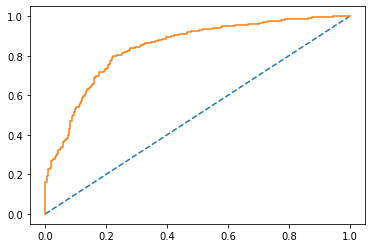

In [79]:
#AUC and ROC for train data wrt NB
probs = NB.predict_proba(Xtrain)
probs = probs[:, 1]
NB_train_auc = roc_auc_score(Ytrain, probs)
print('AUC: %.3f' % NB_train_auc)
train_fpr, train_tpr, train_thresholds = roc_curve(Ytrain, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);

In [80]:
# Performance on Test Dataset wrt NB
NB_Ytest_predict = NB.predict(Xtest)
NB_test_score = NB.score(Xtest, Ytest)
print('Test Data Accuracy:-',NB_test_score)
print('\nConfusion Matrix:-\n',metrics.confusion_matrix(Ytest, NB_Ytest_predict))
print('\nClassification Report:-\n',metrics.classification_report(Ytest, NB_Ytest_predict))

Test Data Accuracy:- 0.7346491228070176

Confusion Matrix:-
 [[120  33]
 [ 88 215]]

Classification Report:-
               precision    recall  f1-score   support

           0       0.58      0.78      0.66       153
           1       0.87      0.71      0.78       303

    accuracy                           0.73       456
   macro avg       0.72      0.75      0.72       456
weighted avg       0.77      0.73      0.74       456



AUC: 0.819


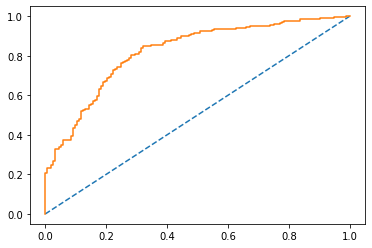

In [81]:
#AUC and ROC for test data wrt NB
probs = NB.predict_proba(Xtest)
probs = probs[:, 1]
NB_test_auc = roc_auc_score(Ytest, probs)
print('AUC: %.3f' % NB_test_auc)
test_fpr, test_tpr, test_thresholds = roc_curve(Ytest, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);

In [82]:
# NB[0]
NB_metrics1=classification_report(Ytrain, NB_Ytrain_predict,output_dict=True)
data1=pd.DataFrame(NB_metrics1).transpose()
NB_train_f1score0=round(data1.loc["0"][2],2)
NB_train_recall0=round(data1.loc["0"][1],2)
NB_train_precision0=round(data1.loc["0"][0],2)
print ('NB_train_precision ',NB_train_precision0)
print ('NB_train_recall ',NB_train_recall0)
print ('NB_train_f1 ',NB_train_f1score0)

NB_metrics2=classification_report(Ytest, NB_Ytest_predict,output_dict=True)
data2=pd.DataFrame(NB_metrics2).transpose()
NB_test_f1score0=round(data2.loc["0"][2],2)
NB_test_recall0=round(data2.loc["0"][1],2)
NB_test_precision0=round(data2.loc["0"][0],2)
print ('NB_test_precision ',NB_test_precision0)
print ('NB_test_recall ',NB_test_recall0)
print ('NB_test_f1 ',NB_test_f1score0)

# NB[1]
NB_metrics3=classification_report(Ytrain, NB_Ytrain_predict,output_dict=True)
data3=pd.DataFrame(NB_metrics3).transpose()
NB_train_f1score1=round(data3.loc["1"][2],2)
NB_train_recall1=round(data3.loc["1"][1],2)
NB_train_precision1=round(data3.loc["1"][0],2)
print ('NB_train_precision ',NB_train_precision1)
print ('NB_train_recall ',NB_train_recall1)
print ('NB_train_f1 ',NB_train_f1score1)

NB_metrics4=classification_report(Ytest, NB_Ytest_predict,output_dict=True)
data4=pd.DataFrame(NB_metrics4).transpose()
NB_test_f1score1=round(data4.loc["1"][2],2)
NB_test_recall1=round(data4.loc["1"][1],2)
NB_test_precision1=round(data4.loc["1"][0],2)
print ('NB_test_precision ',NB_test_precision1)
print ('NB_test_recall ',NB_test_recall1)
print ('NB_test_f1 ',NB_test_f1score1)


NB_train_precision  0.55
NB_train_recall  0.81
NB_train_f1  0.65
NB_test_precision  0.58
NB_test_recall  0.78
NB_test_f1  0.66
NB_train_precision  0.9
NB_train_recall  0.73
NB_train_f1  0.8
NB_test_precision  0.87
NB_test_recall  0.71
NB_test_f1  0.78


## Naive Bayes Model Tuning

In [83]:
NB = GaussianNB()
params = {'var_smoothing': np.logspace(0,-9, num=100)}
gridNB = GridSearchCV(NB, param_grid=params, n_jobs=1)
gridNB.fit(Xtrain,Ytrain)

GridSearchCV(estimator=GaussianNB(), n_jobs=1,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02,...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])})

In [84]:
print(gridNB.best_params_,'\n')
print(gridNB.best_estimator_)

{'var_smoothing': 0.8111308307896871} 

GaussianNB(var_smoothing=0.8111308307896871)


In [85]:
bestmodelNB = gridNB.best_estimator_

In [86]:
NBM_Ytrain_predict = bestmodelNB.predict(Xtrain)
NBM_train_score = bestmodelNB.score(Xtrain, Ytrain)
print('Train Set Accuracy:',NBM_train_score)
print('Confusion Matrix:-\n',confusion_matrix(Ytrain, NBM_Ytrain_predict))
print('\nClassification Report:-\n',classification_report(Ytrain, NBM_Ytrain_predict))

Train Set Accuracy: 0.819038642789821
Confusion Matrix:-
 [[200 107]
 [ 85 669]]

Classification Report:-
               precision    recall  f1-score   support

           0       0.70      0.65      0.68       307
           1       0.86      0.89      0.87       754

    accuracy                           0.82      1061
   macro avg       0.78      0.77      0.78      1061
weighted avg       0.82      0.82      0.82      1061



AUC: 0.879


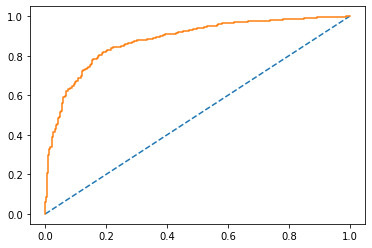

In [87]:
#AUC and ROC for train data wrt NB-M
probs = bestmodelNB.predict_proba(Xtrain)
probs = probs[:, 1]
NBM_train_auc = roc_auc_score(Ytrain, probs)
print('AUC: %.3f' % NBM_train_auc)
train_fpr, train_tpr, train_thresholds = roc_curve(Ytrain, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);

In [88]:
NBM_Ytest_predict = bestmodelNB.predict(Xtest)
NBM_test_score = bestmodelNB.score(Xtest, Ytest)
print('Test Set Accuracy:',NBM_test_score)
print('Confusion Matrix:-\n',confusion_matrix(Ytest, NBM_Ytest_predict))
print('\nClassification Report:-\n',classification_report(Ytest, NBM_Ytest_predict))

Test Set Accuracy: 0.7850877192982456
Confusion Matrix:-
 [[101  52]
 [ 46 257]]

Classification Report:-
               precision    recall  f1-score   support

           0       0.69      0.66      0.67       153
           1       0.83      0.85      0.84       303

    accuracy                           0.79       456
   macro avg       0.76      0.75      0.76       456
weighted avg       0.78      0.79      0.78       456



AUC: 0.838


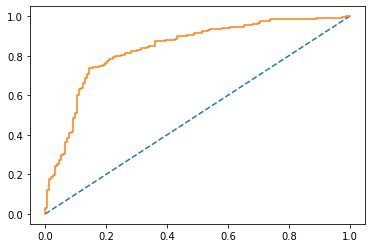

In [89]:
#AUC and ROC for test data wrt NB-M
probs = bestmodelNB.predict_proba(Xtest)
probs = probs[:, 1]
NBM_test_auc = roc_auc_score(Ytest, probs)
print('AUC: %.3f' % NBM_test_auc)
test_fpr, test_tpr, test_thresholds = roc_curve(Ytest, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);

In [90]:
# NBM[0]
NBM_metrics1=classification_report(Ytrain, NBM_Ytrain_predict,output_dict=True)
data1=pd.DataFrame(NBM_metrics1).transpose()
NBM_train_f1score0=round(data1.loc["0"][2],2)
NBM_train_recall0=round(data1.loc["0"][1],2)
NBM_train_precision0=round(data1.loc["0"][0],2)
print ('NBM_train_precision ',NBM_train_precision0)
print ('NBM_train_recall ',NBM_train_recall0)
print ('NBM_train_f1 ',NBM_train_f1score0)

NBM_metrics2=classification_report(Ytest, NBM_Ytest_predict,output_dict=True)
data2=pd.DataFrame(NBM_metrics2).transpose()
NBM_test_f1score0=round(data2.loc["0"][2],2)
NBM_test_recall0=round(data2.loc["0"][1],2)
NBM_test_precision0=round(data2.loc["0"][0],2)
print ('NBM_test_precision ',NBM_test_precision0)
print ('NBM_test_recall ',NBM_test_recall0)
print ('NBM_test_f1 ',NBM_test_f1score0)

# NBM[1]
NBM_metrics3=classification_report(Ytrain, NBM_Ytrain_predict,output_dict=True)
data3=pd.DataFrame(NBM_metrics3).transpose()
NBM_train_f1score1=round(data3.loc["1"][2],2)
NBM_train_recall1=round(data3.loc["1"][1],2)
NBM_train_precision1=round(data3.loc["1"][0],2)
print ('NBM_train_precision ',NBM_train_precision1)
print ('NBM_train_recall ',NBM_train_recall1)
print ('NBM_train_f1 ',NBM_train_f1score1)

NBM_metrics4=classification_report(Ytest, NBM_Ytest_predict,output_dict=True)
data4=pd.DataFrame(NBM_metrics4).transpose()
NBM_test_f1score1=round(data4.loc["1"][2],2)
NBM_test_recall1=round(data4.loc["1"][1],2)
NBM_test_precision1=round(data4.loc["1"][0],2)
print ('NBM_test_precision ',NBM_test_precision1)
print ('NBM_test_recall ',NBM_test_recall1)
print ('NBM_test_f1 ',NBM_test_f1score1)

NBM_train_precision  0.7
NBM_train_recall  0.65
NBM_train_f1  0.68
NBM_test_precision  0.69
NBM_test_recall  0.66
NBM_test_f1  0.67
NBM_train_precision  0.86
NBM_train_recall  0.89
NBM_train_f1  0.87
NBM_test_precision  0.83
NBM_test_recall  0.85
NBM_test_f1  0.84


## Ada Boost

In [91]:
from sklearn.ensemble import AdaBoostClassifier

ADaBo = AdaBoostClassifier(n_estimators=100,random_state=1)
ADaBo.fit(Xtrain,Ytrain)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [92]:
## Performance Matrix on train data set
ADaBo_Ytrain_predict = ADaBo.predict(Xtrain)
ADaBo_train_score = ADaBo.score(Xtrain, Ytrain)
print('Train Data Accuracy:-',ADaBo_train_score)
print('\nConfusion Matrix:-\n',metrics.confusion_matrix(Ytrain, ADaBo_Ytrain_predict))
print('\nClassification Report:-\n',metrics.classification_report(Ytrain, ADaBo_Ytrain_predict))

Train Data Accuracy:- 0.8473138548539114

Confusion Matrix:-
 [[211  96]
 [ 66 688]]

Classification Report:-
               precision    recall  f1-score   support

           0       0.76      0.69      0.72       307
           1       0.88      0.91      0.89       754

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.84      0.85      0.84      1061



AUC: 0.912


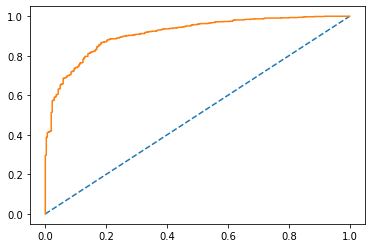

In [93]:
#AUC and ROC for train data wrt AdaBoost
probs = ADaBo.predict_proba(Xtrain)
probs = probs[:, 1]
ADaBo_train_auc = roc_auc_score(Ytrain, probs)
print('AUC: %.3f' % ADaBo_train_auc)
train_fpr, train_tpr, train_thresholds = roc_curve(Ytrain, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);

In [94]:
## Performance Matrix on test data set
ADaBo_Ytest_predict = ADaBo.predict(Xtest)
ADaBo_test_score = ADaBo.score(Xtest, Ytest)
print('Test Data Accuracy:-',ADaBo_test_score)
print('\nConfusion Matrix:-\n',metrics.confusion_matrix(Ytest, ADaBo_Ytest_predict))
print('\nClassification Report:-\n',metrics.classification_report(Ytest, ADaBo_Ytest_predict))

Test Data Accuracy:- 0.8135964912280702

Confusion Matrix:-
 [[100  53]
 [ 32 271]]

Classification Report:-
               precision    recall  f1-score   support

           0       0.76      0.65      0.70       153
           1       0.84      0.89      0.86       303

    accuracy                           0.81       456
   macro avg       0.80      0.77      0.78       456
weighted avg       0.81      0.81      0.81       456



AUC: 0.878


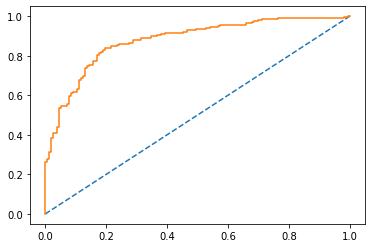

In [95]:
#AUC and ROC for test data wrt AdaBoost
probs = ADaBo.predict_proba(Xtest)
probs = probs[:, 1]
ADaBo_test_auc = roc_auc_score(Ytest, probs)
print('AUC: %.3f' % ADaBo_test_auc)
test_fpr, test_tpr, test_thresholds = roc_curve(Ytest, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);

In [96]:
# ADaBoosting[0]
ADaBo_metrics1=classification_report(Ytrain, ADaBo_Ytrain_predict,output_dict=True)
data1=pd.DataFrame(ADaBo_metrics1).transpose()
ADaBo_train_f1score0=round(data1.loc["0"][2],2)
ADaBo_train_recall0=round(data1.loc["0"][1],2)
ADaBo_train_precision0=round(data1.loc["0"][0],2)
print ('ADaBo_train_precision ',ADaBo_train_precision0)
print ('ADaBo_train_recall ',ADaBo_train_recall0)
print ('ADaBo_train_f1 ',ADaBo_train_f1score0)

ADaBo_metrics2=classification_report(Ytest, ADaBo_Ytest_predict,output_dict=True)
data2=pd.DataFrame(ADaBo_metrics2).transpose()
ADaBo_test_f1score0=round(data2.loc["0"][2],2)
ADaBo_test_recall0=round(data2.loc["0"][1],2)
ADaBo_test_precision0=round(data2.loc["0"][0],2)
print ('ADaBo_test_precision ',ADaBo_test_precision0)
print ('ADaBo_test_recall ',ADaBo_test_recall0)
print ('ADaBo_test_f1 ',ADaBo_test_f1score0)

# ADaBoosting[1]
ADaBo_metrics3=classification_report(Ytrain, ADaBo_Ytrain_predict,output_dict=True)
data3=pd.DataFrame(ADaBo_metrics3).transpose()
ADaBo_train_f1score1=round(data3.loc["1"][2],2)
ADaBo_train_recall1=round(data3.loc["1"][1],2)
ADaBo_train_precision1=round(data3.loc["1"][0],2)
print ('ADaBo_train_precision ',ADaBo_train_precision1)
print ('ADaBo_train_recall ',ADaBo_train_recall1)
print ('ADaBo_train_f1 ',ADaBo_train_f1score1)

ADaBo_metrics4=classification_report(Ytest, ADaBo_Ytest_predict,output_dict=True)
data4=pd.DataFrame(ADaBo_metrics4).transpose()
ADaBo_test_f1score1=round(data4.loc["1"][2],2)
ADaBo_test_recall1=round(data4.loc["1"][1],2)
ADaBo_test_precision1=round(data4.loc["1"][0],2)
print ('ADaBo_test_precision ',ADaBo_test_precision1)
print ('ADaBo_test_recall ',ADaBo_test_recall1)
print ('ADaBo_test_f1 ',ADaBo_test_f1score1)


ADaBo_train_precision  0.76
ADaBo_train_recall  0.69
ADaBo_train_f1  0.72
ADaBo_test_precision  0.76
ADaBo_test_recall  0.65
ADaBo_test_f1  0.7
ADaBo_train_precision  0.88
ADaBo_train_recall  0.91
ADaBo_train_f1  0.89
ADaBo_test_precision  0.84
ADaBo_test_recall  0.89
ADaBo_test_f1  0.86


## Gradient Boost

In [97]:
from sklearn.ensemble import GradientBoostingClassifier
GBo = GradientBoostingClassifier(random_state=1)
GBo = GBo.fit(Xtrain, Ytrain)

In [98]:
## Performance Matrix on train data set
GBo_Ytrain_predict = GBo.predict(Xtrain)
GBo_train_score = GBo.score(Xtrain, Ytrain)
print('Train Data Accuracy',GBo_train_score)
print('\nConfusion Matrix:-\n',metrics.confusion_matrix(Ytrain, GBo_Ytrain_predict))
print('\nClassification Report:-\n',metrics.classification_report(Ytrain, GBo_Ytrain_predict))

Train Data Accuracy 0.884071630537229

Confusion Matrix:-
 [[227  80]
 [ 43 711]]

Classification Report:-
               precision    recall  f1-score   support

           0       0.84      0.74      0.79       307
           1       0.90      0.94      0.92       754

    accuracy                           0.88      1061
   macro avg       0.87      0.84      0.85      1061
weighted avg       0.88      0.88      0.88      1061



AUC: 0.945


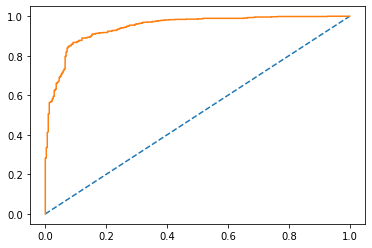

In [99]:
#AUC and ROC for train data wrt GradientBoost
probs = GBo.predict_proba(Xtrain)
probs = probs[:, 1]
GBo_train_auc = roc_auc_score(Ytrain, probs)
print('AUC: %.3f' % GBo_train_auc)
train_fpr, train_tpr, train_thresholds = roc_curve(Ytrain, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);

In [100]:
## Performance Matrix on test data set
GBo_Ytest_predict = GBo.predict(Xtest)
GBo_test_score = GBo.score(Xtest, Ytest)
print('Test Data Accuracy',GBo_test_score)
print('\nConfusion Matrix:-\n',metrics.confusion_matrix(Ytest, GBo_Ytest_predict))
print('\nClassification Report:-\n',metrics.classification_report(Ytest, GBo_Ytest_predict))

Test Data Accuracy 0.8223684210526315

Confusion Matrix:-
 [[101  52]
 [ 29 274]]

Classification Report:-
               precision    recall  f1-score   support

           0       0.78      0.66      0.71       153
           1       0.84      0.90      0.87       303

    accuracy                           0.82       456
   macro avg       0.81      0.78      0.79       456
weighted avg       0.82      0.82      0.82       456



AUC: 0.886


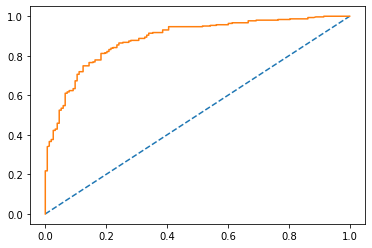

In [101]:
#AUC and ROC for test data wrt GradientBoost
probs = GBo.predict_proba(Xtest)
probs = probs[:, 1]
GBo_test_auc = roc_auc_score(Ytest, probs)
print('AUC: %.3f' % GBo_test_auc)
test_fpr, test_tpr, test_thresholds = roc_curve(Ytest, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);

In [102]:
# Gradient Boosting[0]
GBo_metrics1=classification_report(Ytrain, GBo_Ytrain_predict,output_dict=True)
data1=pd.DataFrame(GBo_metrics1).transpose()
GBo_train_f1score0=round(data1.loc["0"][2],2)
GBo_train_recall0=round(data1.loc["0"][1],2)
GBo_train_precision0=round(data1.loc["0"][0],2)
print ('GBo_train_precision ',GBo_train_precision0)
print ('GBo_train_recall ',GBo_train_recall0)
print ('GBo_train_f1 ',GBo_train_f1score0)

GBo_metrics2=classification_report(Ytest, GBo_Ytest_predict,output_dict=True)
data2=pd.DataFrame(GBo_metrics2).transpose()
GBo_test_f1score0=round(data2.loc["0"][2],2)
GBo_test_recall0=round(data2.loc["0"][1],2)
GBo_test_precision0=round(data2.loc["0"][0],2)
print ('GBo_test_precision ',GBo_test_precision0)
print ('GBo_test_recall ',GBo_test_recall0)
print ('GBo_test_f1 ',GBo_test_f1score0)

# Gradient Boosting[1]
GBo_metrics3=classification_report(Ytrain, GBo_Ytrain_predict,output_dict=True)
data3=pd.DataFrame(GBo_metrics3).transpose()
GBo_train_f1score1=round(data3.loc["1"][2],2)
GBo_train_recall1=round(data3.loc["1"][1],2)
GBo_train_precision1=round(data3.loc["1"][0],2)
print ('GBo_train_precision ',GBo_train_precision1)
print ('GBo_train_recall ',GBo_train_recall1)
print ('GBo_train_f1 ',GBo_train_f1score1)

GBo_metrics4=classification_report(Ytest, GBo_Ytest_predict,output_dict=True)
data4=pd.DataFrame(GBo_metrics4).transpose()
GBo_test_f1score1=round(data4.loc["1"][2],2)
GBo_test_recall1=round(data4.loc["1"][1],2)
GBo_test_precision1=round(data4.loc["1"][0],2)
print ('GBo_test_precision ',GBo_test_precision1)
print ('GBo_test_recall ',GBo_test_recall1)
print ('GBo_test_f1 ',GBo_test_f1score1)


GBo_train_precision  0.84
GBo_train_recall  0.74
GBo_train_f1  0.79
GBo_test_precision  0.78
GBo_test_recall  0.66
GBo_test_f1  0.71
GBo_train_precision  0.9
GBo_train_recall  0.94
GBo_train_f1  0.92
GBo_test_precision  0.84
GBo_test_recall  0.9
GBo_test_f1  0.87


## Decision Tree

In [103]:
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image  
from sklearn import tree

In [104]:
DT = DecisionTreeClassifier(criterion = 'gini', random_state=1)
DT.fit(Xtrain, Ytrain)

DecisionTreeClassifier(random_state=1)

In [105]:
print(DT.score(Xtrain, Ytrain))
print(DT.score(Xtest, Ytest))

1.0
0.7697368421052632


In [106]:
## Performance Matrix on train data set
DT_Ytrain_predict = DT.predict(Xtrain)
DT_train_score = DT.score(Xtrain, Ytrain)
print('Train Data Accuracy:-',DT_train_score)
print('\nConfusion Matrix:-\n',metrics.confusion_matrix(Ytrain, DT_Ytrain_predict))
print('\nClassification Report:-\n',metrics.classification_report(Ytrain, DT_Ytrain_predict))

Train Data Accuracy:- 1.0

Confusion Matrix:-
 [[307   0]
 [  0 754]]

Classification Report:-
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       307
           1       1.00      1.00      1.00       754

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



AUC: 1.000


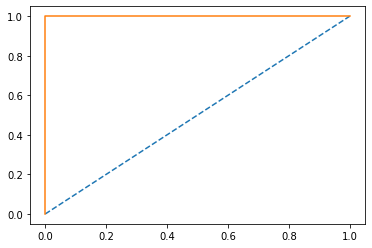

In [107]:
#AUC and ROC for train data wrt Decision Tree
probs = DT.predict_proba(Xtrain)
probs = probs[:, 1]
DT_train_auc = roc_auc_score(Ytrain, probs)
print('AUC: %.3f' % DT_train_auc)
train_fpr, train_tpr, train_thresholds = roc_curve(Ytrain, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);

In [108]:
## Performance Matrix on test data set
DT_Ytest_predict = DT.predict(Xtest)
DT_test_score = DT.score(Xtest, Ytest)
print('Test Data Accuracy:-',DT_test_score)
print('\nConfusion Matrix:-\n',metrics.confusion_matrix(Ytest, DT_Ytest_predict))
print('\nClassification Report:-\n',metrics.classification_report(Ytest, DT_Ytest_predict))

Test Data Accuracy:- 0.7697368421052632

Confusion Matrix:-
 [[ 92  61]
 [ 44 259]]

Classification Report:-
               precision    recall  f1-score   support

           0       0.68      0.60      0.64       153
           1       0.81      0.85      0.83       303

    accuracy                           0.77       456
   macro avg       0.74      0.73      0.73       456
weighted avg       0.76      0.77      0.77       456



AUC: 0.728


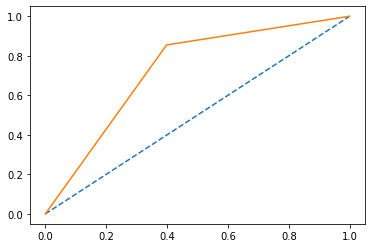

In [109]:
#AUC and ROC for test data wrt Decision Tree
probs = DT.predict_proba(Xtest)
probs = probs[:, 1]
DT_test_auc = roc_auc_score(Ytest, probs)
print('AUC: %.3f' % DT_test_auc)
test_fpr, test_tpr, test_thresholds = roc_curve(Ytest, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);

In [110]:
# Decision Tree[0]
DT_metrics1=classification_report(Ytrain, DT_Ytrain_predict,output_dict=True)
data1=pd.DataFrame(DT_metrics1).transpose()
DT_train_f1score0=round(data1.loc["0"][2],2)
DT_train_recall0=round(data1.loc["0"][1],2)
DT_train_precision0=round(data1.loc["0"][0],2)
print ('DT_train_precision ',DT_train_precision0)
print ('DT_train_recall ',DT_train_recall0)
print ('DT_train_f1 ',DT_train_f1score0)

DT_metrics2=classification_report(Ytest, DT_Ytest_predict,output_dict=True)
data2=pd.DataFrame(DT_metrics2).transpose()
DT_test_f1score0=round(data2.loc["0"][2],2)
DT_test_recall0=round(data2.loc["0"][1],2)
DT_test_precision0=round(data2.loc["0"][0],2)
print ('DT_test_precision ',DT_test_precision0)
print ('DT_test_recall ',DT_test_recall0)
print ('DT_test_f1 ',DT_test_f1score0)

# Decision Tree[1]
DT_metrics3=classification_report(Ytrain, DT_Ytrain_predict,output_dict=True)
data3=pd.DataFrame(DT_metrics3).transpose()
DT_train_f1score1=round(data3.loc["1"][2],2)
DT_train_recall1=round(data3.loc["1"][1],2)
DT_train_precision1=round(data3.loc["1"][0],2)
print ('DT_train_precision ',DT_train_precision1)
print ('DT_train_recall ',DT_train_recall1)
print ('DT_train_f1 ',DT_train_f1score1)

DT_metrics4=classification_report(Ytest, DT_Ytest_predict,output_dict=True)
data4=pd.DataFrame(DT_metrics4).transpose()
DT_test_f1score1=round(data4.loc["1"][2],2)
DT_test_recall1=round(data4.loc["1"][1],2)
DT_test_precision1=round(data4.loc["1"][0],2)
print ('DT_test_precision ',DT_test_precision1)
print ('DT_test_recall ',DT_test_recall1)
print ('DT_test_f1 ',DT_test_f1score1)


DT_train_precision  1.0
DT_train_recall  1.0
DT_train_f1  1.0
DT_test_precision  0.68
DT_test_recall  0.6
DT_test_f1  0.64
DT_train_precision  1.0
DT_train_recall  1.0
DT_train_f1  1.0
DT_test_precision  0.81
DT_test_recall  0.85
DT_test_f1  0.83


## Random Forest

In [111]:
from sklearn.ensemble import RandomForestClassifier

RF=RandomForestClassifier(n_estimators=100,random_state=1)
RF.fit(Xtrain, Ytrain)

RandomForestClassifier(random_state=1)

In [112]:
## Performance Matrix on train data set
RF_Ytrain_predict = RF.predict(Xtrain)
RF_train_score =RF.score(Xtrain, Ytrain)
print('Train Data Accuracy:-',RF_train_score)
print('\nConfusion Matrix:-\n',metrics.confusion_matrix(Ytrain, RF_Ytrain_predict))
print('\nClassification Report:-\n',metrics.classification_report(Ytrain, RF_Ytrain_predict))

Train Data Accuracy:- 1.0

Confusion Matrix:-
 [[307   0]
 [  0 754]]

Classification Report:-
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       307
           1       1.00      1.00      1.00       754

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



AUC: 1.000


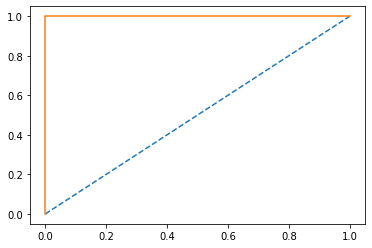

In [113]:
#AUC and ROC for train data wrt RandomForest
probs = RF.predict_proba(Xtrain)
probs = probs[:, 1]
RF_train_auc = roc_auc_score(Ytrain, probs)
print('AUC: %.3f' % RF_train_auc)
train_fpr, train_tpr, train_thresholds = roc_curve(Ytrain, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);

In [114]:
## Performance Matrix on test data set
RF_Ytest_predict = RF.predict(Xtest)
RF_test_score = RF.score(Xtest, Ytest)
print('Test Data Accuracy:-',RF_test_score)
print('\nConfusion Matrix:-\n',metrics.confusion_matrix(Ytest, RF_Ytest_predict))
print('\nClassification Report:-\n',metrics.classification_report(Ytest, RF_Ytest_predict))

Test Data Accuracy:- 0.8026315789473685

Confusion Matrix:-
 [[ 93  60]
 [ 30 273]]

Classification Report:-
               precision    recall  f1-score   support

           0       0.76      0.61      0.67       153
           1       0.82      0.90      0.86       303

    accuracy                           0.80       456
   macro avg       0.79      0.75      0.77       456
weighted avg       0.80      0.80      0.80       456



AUC: 0.867


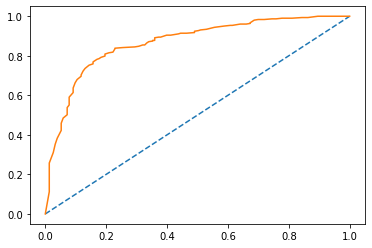

In [115]:
#AUC and ROC for test data wrt Random Forest
probs = RF.predict_proba(Xtest)
probs = probs[:, 1]
RF_test_auc = roc_auc_score(Ytest, probs)
print('AUC: %.3f' % RF_test_auc)
test_fpr, test_tpr, test_thresholds = roc_curve(Ytest, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);

In [116]:
# Random Forest[0]
RF_metrics1=classification_report(Ytrain, RF_Ytrain_predict,output_dict=True)
data1=pd.DataFrame(RF_metrics1).transpose()
RF_train_f1score0=round(data1.loc["0"][2],2)
RF_train_recall0=round(data1.loc["0"][1],2)
RF_train_precision0=round(data1.loc["0"][0],2)
print ('RF_train_precision ',RF_train_precision0)
print ('RF_train_recall ',RF_train_recall0)
print ('RF_train_f1 ',RF_train_f1score0)

RF_metrics2=classification_report(Ytest, RF_Ytest_predict,output_dict=True)
data2=pd.DataFrame(RF_metrics2).transpose()
RF_test_f1score0=round(data2.loc["0"][2],2)
RF_test_recall0=round(data2.loc["0"][1],2)
RF_test_precision0=round(data2.loc["0"][0],2)
print ('RF_test_precision ',RF_test_precision0)
print ('RF_test_recall ',RF_test_recall0)
print ('RF_test_f1 ',RF_test_f1score0)

# Random Forest [1]
RF_metrics3=classification_report(Ytrain, RF_Ytrain_predict,output_dict=True)
data3=pd.DataFrame(RF_metrics3).transpose()
RF_train_f1score1=round(data3.loc["1"][2],2)
RF_train_recall1=round(data3.loc["1"][1],2)
RF_train_precision1=round(data3.loc["1"][0],2)
print ('RF_train_precision ',RF_train_precision1)
print ('RF_train_recall ',RF_train_recall1)
print ('RF_train_f1 ',RF_train_f1score1)

RF_metrics4=classification_report(Ytest, RF_Ytest_predict,output_dict=True)
data4=pd.DataFrame(RF_metrics4).transpose()
RF_test_f1score1=round(data4.loc["1"][2],2)
RF_test_recall1=round(data4.loc["1"][1],2)
RF_test_precision1=round(data4.loc["1"][0],2)
print ('RF_test_precision ',RF_test_precision1)
print ('RF_test_recall ',RF_test_recall1)
print ('RF_test_f1 ',RF_test_f1score1)

RF_train_precision  1.0
RF_train_recall  1.0
RF_train_f1  1.0
RF_test_precision  0.76
RF_test_recall  0.61
RF_test_f1  0.67
RF_train_precision  1.0
RF_train_recall  1.0
RF_train_f1  1.0
RF_test_precision  0.82
RF_test_recall  0.9
RF_test_f1  0.86


## Random Forest Model Tuning

In [117]:
params = {'n_estimators': [15,25,30],
              'criterion': ['gini','entropy'], 
              'max_depth': [3,7,None], 
              'min_samples_split': [5,10,], 
              'min_samples_leaf': [1,3,5], 
              'max_features': [2,'auto'],
             }

gridRF = GridSearchCV(RF, param_grid=params, n_jobs=1)
gridRF.fit(Xtrain,Ytrain)

GridSearchCV(estimator=RandomForestClassifier(random_state=1), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 7, None], 'max_features': [2, 'auto'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [5, 10],
                         'n_estimators': [15, 25, 30]})

In [118]:
print(gridRF.best_params_,'\n')
print(gridRF.best_estimator_)

{'criterion': 'entropy', 'max_depth': None, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 25} 

RandomForestClassifier(criterion='entropy', max_features=2,
                       min_samples_split=10, n_estimators=25, random_state=1)


In [119]:
bestmodelRF = gridRF.best_estimator_

In [120]:
RFM_Ytrain_predict = bestmodelRF.predict(Xtrain)
RFM_train_score = bestmodelRF.score(Xtrain, Ytrain)
print('Train Set Accuracy:',RFM_train_score)
print('Confusion Matrix:-\n',confusion_matrix(Ytrain, RFM_Ytrain_predict))
print('\nClassification Report:-\n',classification_report(Ytrain, RFM_Ytrain_predict))

Train Set Accuracy: 0.8963242224316682
Confusion Matrix:-
 [[221  86]
 [ 24 730]]

Classification Report:-
               precision    recall  f1-score   support

           0       0.90      0.72      0.80       307
           1       0.89      0.97      0.93       754

    accuracy                           0.90      1061
   macro avg       0.90      0.84      0.87      1061
weighted avg       0.90      0.90      0.89      1061



AUC: 0.962


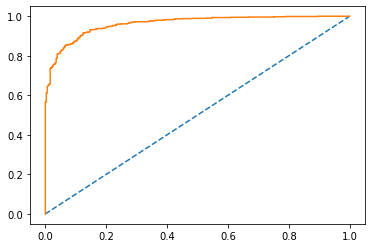

In [121]:
#AUC and ROC for train data wrt RF-M
probs = bestmodelRF.predict_proba(Xtrain)
probs = probs[:, 1]
RFM_train_auc = roc_auc_score(Ytrain, probs)
print('AUC: %.3f' % RFM_train_auc)
train_fpr, train_tpr, train_thresholds = roc_curve(Ytrain, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);

In [122]:
RFM_Ytest_predict = bestmodelRF.predict(Xtest)
RFM_test_score = bestmodelRF.score(Xtest, Ytest)
print('Test Set Accuracy:',RFM_test_score)
print('Confusion Matrix:-\n',confusion_matrix(Ytest, RFM_Ytest_predict))
print('\nClassification Report:-\n',classification_report(Ytest, RFM_Ytest_predict))

Test Set Accuracy: 0.8070175438596491
Confusion Matrix:-
 [[ 89  64]
 [ 24 279]]

Classification Report:-
               precision    recall  f1-score   support

           0       0.79      0.58      0.67       153
           1       0.81      0.92      0.86       303

    accuracy                           0.81       456
   macro avg       0.80      0.75      0.77       456
weighted avg       0.80      0.81      0.80       456



AUC: 0.868


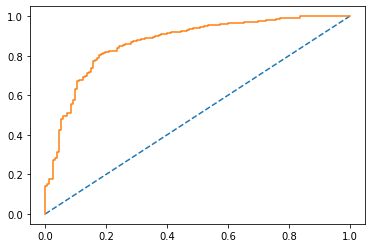

In [123]:
#AUC and ROC for test data wrt RF-M
probs = bestmodelRF.predict_proba(Xtest)
probs = probs[:, 1]
RFM_test_auc = roc_auc_score(Ytest, probs)
print('AUC: %.3f' % RFM_test_auc)
test_fpr, test_tpr, test_thresholds = roc_curve(Ytest, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);

In [124]:
# RFM[0]
RFM_metrics1=classification_report(Ytrain, RFM_Ytrain_predict,output_dict=True)
data1=pd.DataFrame(RFM_metrics1).transpose()
RFM_train_f1score0=round(data1.loc["0"][2],2)
RFM_train_recall0=round(data1.loc["0"][1],2)
RFM_train_precision0=round(data1.loc["0"][0],2)
print ('RFM_train_precision ',RFM_train_precision0)
print ('RFM_train_recall ',RFM_train_recall0)
print ('RFM_train_f1 ',RFM_train_f1score0)

RFM_metrics2=classification_report(Ytest, RFM_Ytest_predict,output_dict=True)
data2=pd.DataFrame(RFM_metrics2).transpose()
RFM_test_f1score0=round(data2.loc["0"][2],2)
RFM_test_recall0=round(data2.loc["0"][1],2)
RFM_test_precision0=round(data2.loc["0"][0],2)
print ('RFM_test_precision ',RFM_test_precision0)
print ('RFM_test_recall ',RFM_test_recall0)
print ('RFM_test_f1 ',RFM_test_f1score0)

# RFM[1]
RFM_metrics3=classification_report(Ytrain, RFM_Ytrain_predict,output_dict=True)
data3=pd.DataFrame(RFM_metrics3).transpose()
RFM_train_f1score1=round(data3.loc["1"][2],2)
RFM_train_recall1=round(data3.loc["1"][1],2)
RFM_train_precision1=round(data3.loc["1"][0],2)
print ('RFM_train_precision ',RFM_train_precision1)
print ('RFM_train_recall ',RFM_train_recall1)
print ('RFM_train_f1 ',RFM_train_f1score1)

RFM_metrics4=classification_report(Ytest, RFM_Ytest_predict,output_dict=True)
data4=pd.DataFrame(RFM_metrics4).transpose()
RFM_test_f1score1=round(data4.loc["1"][2],2)
RFM_test_recall1=round(data4.loc["1"][1],2)
RFM_test_precision1=round(data4.loc["1"][0],2)
print ('RFM_test_precision ',RFM_test_precision1)
print ('RFM_test_recall ',RFM_test_recall1)
print ('RFM_test_f1 ',RFM_test_f1score1)

RFM_train_precision  0.9
RFM_train_recall  0.72
RFM_train_f1  0.8
RFM_test_precision  0.79
RFM_test_recall  0.58
RFM_test_f1  0.67
RFM_train_precision  0.89
RFM_train_recall  0.97
RFM_train_f1  0.93
RFM_test_precision  0.81
RFM_test_recall  0.92
RFM_test_f1  0.86


## Bagging with Decision Tree

In [125]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier()
Bag=BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=1)
Bag.fit(Xtrain, Ytrain)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=1)

In [126]:
## Performance Matrix on train data set
Bag_Ytrain_predict = Bag.predict(Xtrain)
Bag_train_score =Bag.score(Xtrain, Ytrain)
print('Train Data Accuracy:-',Bag_train_score)
print('\nConfusion Matrix:-\n',metrics.confusion_matrix(Ytrain, Bag_Ytrain_predict))
print('\nClassification Report:-\n',metrics.classification_report(Ytrain, Bag_Ytrain_predict))

Train Data Accuracy:- 1.0

Confusion Matrix:-
 [[307   0]
 [  0 754]]

Classification Report:-
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       307
           1       1.00      1.00      1.00       754

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



AUC: 1.000


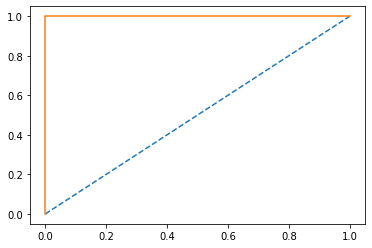

In [127]:
#AUC and ROC for train data wrt Bagging using Decision Tree
probs = Bag.predict_proba(Xtrain)
probs = probs[:, 1]
Bag_train_auc = roc_auc_score(Ytrain, probs)
print('AUC: %.3f' % Bag_train_auc)
train_fpr, train_tpr, train_thresholds = roc_curve(Ytrain, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);

In [128]:
## Performance Matrix on test data set
Bag_Ytest_predict = Bag.predict(Xtest)
Bag_test_score = Bag.score(Xtest, Ytest)
print('Test Data Accuracy:-',Bag_test_score)
print('\nConfusion Matrix:-\n',metrics.confusion_matrix(Ytest, Bag_Ytest_predict))
print('\nClassification Report:-\n',metrics.classification_report(Ytest, Bag_Ytest_predict))

Test Data Accuracy:- 0.8048245614035088

Confusion Matrix:-
 [[103  50]
 [ 39 264]]

Classification Report:-
               precision    recall  f1-score   support

           0       0.73      0.67      0.70       153
           1       0.84      0.87      0.86       303

    accuracy                           0.80       456
   macro avg       0.78      0.77      0.78       456
weighted avg       0.80      0.80      0.80       456



AUC: 0.865


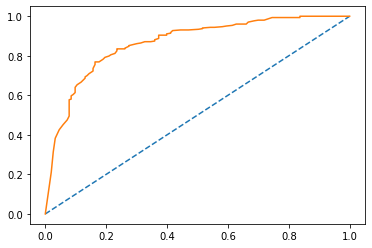

In [129]:
#AUC and ROC for test data wrt Bagging with Decision Tree
probs = Bag.predict_proba(Xtest)
probs = probs[:, 1]
Bag_test_auc = roc_auc_score(Ytest, probs)
print('AUC: %.3f' % Bag_test_auc)
test_fpr, test_tpr, test_thresholds = roc_curve(Ytest, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);

In [130]:
# Bagging with Decision Tree[0]
Bag_metrics1=classification_report(Ytrain, Bag_Ytrain_predict,output_dict=True)
data1=pd.DataFrame(Bag_metrics1).transpose()
Bag_train_f1score0=round(data1.loc["0"][2],2)
Bag_train_recall0=round(data1.loc["0"][1],2)
Bag_train_precision0=round(data1.loc["0"][0],2)
print ('Bag_train_precision ',Bag_train_precision0)
print ('Bag_train_recall ',Bag_train_recall0)
print ('Bag_train_f1 ',Bag_train_f1score0)

Bag_metrics2=classification_report(Ytest, Bag_Ytest_predict,output_dict=True)
data2=pd.DataFrame(Bag_metrics2).transpose()
Bag_test_f1score0=round(data2.loc["0"][2],2)
Bag_test_recall0=round(data2.loc["0"][1],2)
Bag_test_precision0=round(data2.loc["0"][0],2)
print ('Bag_test_precision ',Bag_test_precision0)
print ('Bag_test_recall ',Bag_test_recall0)
print ('Bag_test_f1 ',Bag_test_f1score0)

# Bagging with Decision Tree[1]
Bag_metrics3=classification_report(Ytrain, Bag_Ytrain_predict,output_dict=True)
data3=pd.DataFrame(Bag_metrics3).transpose()
Bag_train_f1score1=round(data3.loc["1"][2],2)
Bag_train_recall1=round(data3.loc["1"][1],2)
Bag_train_precision1=round(data3.loc["1"][0],2)
print ('Bag_train_precision ',Bag_train_precision1)
print ('Bag_train_recall ',Bag_train_recall1)
print ('Bag_train_f1 ',Bag_train_f1score1)

Bag_metrics4=classification_report(Ytest, Bag_Ytest_predict,output_dict=True)
data4=pd.DataFrame(Bag_metrics4).transpose()
Bag_test_f1score1=round(data4.loc["1"][2],2)
Bag_test_recall1=round(data4.loc["1"][1],2)
Bag_test_precision1=round(data4.loc["1"][0],2)
print ('Bag_test_precision ',Bag_test_precision1)
print ('Bag_test_recall ',Bag_test_recall1)
print ('Bag_test_f1 ',Bag_test_f1score1)


Bag_train_precision  1.0
Bag_train_recall  1.0
Bag_train_f1  1.0
Bag_test_precision  0.73
Bag_test_recall  0.67
Bag_test_f1  0.7
Bag_train_precision  1.0
Bag_train_recall  1.0
Bag_train_f1  1.0
Bag_test_precision  0.84
Bag_test_recall  0.87
Bag_test_f1  0.86


## Bagging with Random Forest

In [131]:
ranfo = RandomForestClassifier()
Bag1=BaggingClassifier(base_estimator=ranfo,n_estimators=100,random_state=1)
Bag1.fit(Xtrain, Ytrain)

BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=100,
                  random_state=1)

In [132]:
## Performance Matrix on train data set
BagRF_Ytrain_predict = Bag1.predict(Xtrain)
BagRF_train_score =Bag1.score(Xtrain, Ytrain)
print('Train Data Accuracy:-',BagRF_train_score)
print('\nConfusion Matrix:-\n',metrics.confusion_matrix(Ytrain, BagRF_Ytrain_predict))
print('\nClassification Report:-\n',metrics.classification_report(Ytrain, BagRF_Ytrain_predict))

Train Data Accuracy:- 0.9679547596606974

Confusion Matrix:-
 [[277  30]
 [  4 750]]

Classification Report:-
               precision    recall  f1-score   support

           0       0.99      0.90      0.94       307
           1       0.96      0.99      0.98       754

    accuracy                           0.97      1061
   macro avg       0.97      0.95      0.96      1061
weighted avg       0.97      0.97      0.97      1061



AUC: 0.998


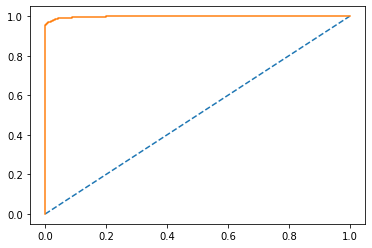

In [133]:
#AUC and ROC for train data wrt RandomForest
probs = Bag1.predict_proba(Xtrain)
probs = probs[:, 1]
BagRF_train_auc = roc_auc_score(Ytrain, probs)
print('AUC: %.3f' % BagRF_train_auc)
train_fpr, train_tpr, train_thresholds = roc_curve(Ytrain, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);

In [134]:
## Performance Matrix on test data set
BagRF_Ytest_predict = Bag1.predict(Xtest)
BagRF_test_score = Bag1.score(Xtest, Ytest)
print('Test Data Accuracy:-',BagRF_test_score)
print('\nConfusion Matrix:-\n',metrics.confusion_matrix(Ytest, BagRF_Ytest_predict))
print('\nClassification Report:-\n',metrics.classification_report(Ytest, BagRF_Ytest_predict))

Test Data Accuracy:- 0.8179824561403509

Confusion Matrix:-
 [[ 97  56]
 [ 27 276]]

Classification Report:-
               precision    recall  f1-score   support

           0       0.78      0.63      0.70       153
           1       0.83      0.91      0.87       303

    accuracy                           0.82       456
   macro avg       0.81      0.77      0.78       456
weighted avg       0.81      0.82      0.81       456



AUC: 0.873


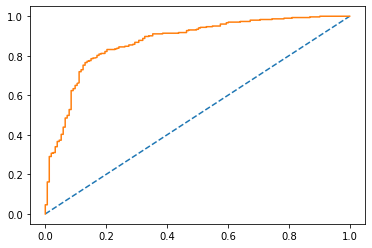

In [135]:
#AUC and ROC for test data wrt Random Forest
probs = Bag1.predict_proba(Xtest)
probs = probs[:, 1]
BagRF_test_auc = roc_auc_score(Ytest, probs)
print('AUC: %.3f' % BagRF_test_auc)
test_fpr, test_tpr, test_thresholds = roc_curve(Ytest, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);

In [136]:
# Bagging with RF[0]
BagRF_metrics1=classification_report(Ytrain, BagRF_Ytrain_predict,output_dict=True)
data1=pd.DataFrame(BagRF_metrics1).transpose()
BagRF_train_f1score0=round(data1.loc["0"][2],2)
BagRF_train_recall0=round(data1.loc["0"][1],2)
BagRF_train_precision0=round(data1.loc["0"][0],2)
print ('BagRF_train_precision ',BagRF_train_precision0)
print ('BagRF_train_recall ',BagRF_train_recall0)
print ('BagRF_train_f1 ',BagRF_train_f1score0)

BagRF_metrics2=classification_report(Ytest, BagRF_Ytest_predict,output_dict=True)
data2=pd.DataFrame(BagRF_metrics2).transpose()
BagRF_test_f1score0=round(data2.loc["0"][2],2)
BagRF_test_recall0=round(data2.loc["0"][1],2)
BagRF_test_precision0=round(data2.loc["0"][0],2)
print ('BagRF_test_precision ',BagRF_test_precision0)
print ('BagRF_test_recall ',BagRF_test_recall0)
print ('BagRF_test_f1 ',BagRF_test_f1score0)

# Bagging with RF[1]
BagRF_metrics3=classification_report(Ytrain, BagRF_Ytrain_predict,output_dict=True)
data3=pd.DataFrame(BagRF_metrics3).transpose()
BagRF_train_f1score1=round(data3.loc["1"][2],2)
BagRF_train_recall1=round(data3.loc["1"][1],2)
BagRF_train_precision1=round(data3.loc["1"][0],2)
print ('BagRF_train_precision ',BagRF_train_precision1)
print ('BagRF_train_recall ',BagRF_train_recall1)
print ('BagRF_train_f1 ',BagRF_train_f1score1)

BagRF_metrics4=classification_report(Ytest, BagRF_Ytest_predict,output_dict=True)
data4=pd.DataFrame(BagRF_metrics4).transpose()
BagRF_test_f1score1=round(data4.loc["1"][2],2)
BagRF_test_recall1=round(data4.loc["1"][1],2)
BagRF_test_precision1=round(data4.loc["1"][0],2)
print ('BagRF_test_precision ',BagRF_test_precision1)
print ('BagRF_test_recall ',BagRF_test_recall1)
print ('BagRF_test_f1 ',BagRF_test_f1score1)


BagRF_train_precision  0.99
BagRF_train_recall  0.9
BagRF_train_f1  0.94
BagRF_test_precision  0.78
BagRF_test_recall  0.63
BagRF_test_f1  0.7
BagRF_train_precision  0.96
BagRF_train_recall  0.99
BagRF_train_f1  0.98
BagRF_test_precision  0.83
BagRF_test_recall  0.91
BagRF_test_f1  0.87


## Applying SMOTE

In [137]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
Xtrain_res, Ytrain_res = sm.fit_resample(Xtrain, Ytrain.ravel())

Xtrain_res.shape

(1508, 31)

## Naive Bayes using SMOTE

In [138]:
NBSM= gridNB.fit(Xtrain_res, Ytrain_res)

In [139]:
## Performance Matrix on train data set with SMOTE
NBSM_Ytrain_predict = NBSM.predict(Xtrain_res)
NBSM_train_score = NBSM.score(Xtrain_res, Ytrain_res)
print(NBSM_train_score)
print(metrics.confusion_matrix(Ytrain_res, NBSM_Ytrain_predict))
print(metrics.classification_report(Ytrain_res ,NBSM_Ytrain_predict))

0.8169761273209549
[[696  58]
 [218 536]]
              precision    recall  f1-score   support

           0       0.76      0.92      0.83       754
           1       0.90      0.71      0.80       754

    accuracy                           0.82      1508
   macro avg       0.83      0.82      0.81      1508
weighted avg       0.83      0.82      0.81      1508



AUC: 0.897


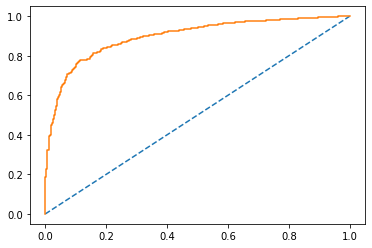

In [140]:
#AUC and ROC for train data wrt NB using SMOTE
probs = NBSM.predict_proba(Xtrain_res)
probs = probs[:, 1]
NBSM_train_auc = roc_auc_score(Ytrain_res, probs)
print('AUC: %.3f' % NBSM_train_auc)
train_fpr, train_tpr, train_thresholds = roc_curve(Ytrain_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);

In [141]:
## Performance Matrix on test data set
NBSM_Ytest_predict = NBSM.predict(Xtest)
NBSM_test_score = NBSM.score(Xtest, Ytest)
print(NBSM_test_score)
print(metrics.confusion_matrix(Ytest, NBSM_Ytest_predict))
print(metrics.classification_report(Ytest, NBSM_Ytest_predict))

0.7478070175438597
[[128  25]
 [ 90 213]]
              precision    recall  f1-score   support

           0       0.59      0.84      0.69       153
           1       0.89      0.70      0.79       303

    accuracy                           0.75       456
   macro avg       0.74      0.77      0.74       456
weighted avg       0.79      0.75      0.75       456



AUC: 0.836


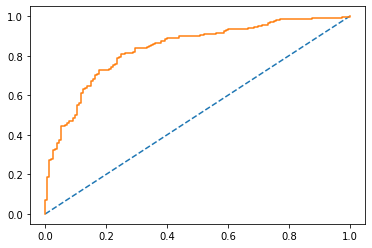

In [142]:
#AUC and ROC for test data wrt NB using SMOTE
probs = NBSM.predict_proba(Xtest)
probs = probs[:, 1]
NBSM_test_auc = roc_auc_score(Ytest, probs)
print('AUC: %.3f' % NBSM_test_auc)
test_fpr, test_tpr, test_thresholds = roc_curve(Ytest, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);

In [143]:
# Naive Bayes with SMOTE[0]
NBSM_metrics1=classification_report(Ytrain_res, NBSM_Ytrain_predict,output_dict=True)
data1=pd.DataFrame(NBSM_metrics1).transpose()
NBSM_train_f1score0=round(data1.loc["0"][2],2)
NBSM_train_recall0=round(data1.loc["0"][1],2)
NBSM_train_precision0=round(data1.loc["0"][0],2)
print ('NBSM_train_precision ',NBSM_train_precision0)
print ('NBSM_train_recall ',NBSM_train_recall0)
print ('NBSM_train_f1 ',NBSM_train_f1score0)

NBSM_metrics2=classification_report(Ytest, NBSM_Ytest_predict,output_dict=True)
data2=pd.DataFrame(NBSM_metrics2).transpose()
NBSM_test_f1score0=round(data2.loc["0"][2],2)
NBSM_test_recall0=round(data2.loc["0"][1],2)
NBSM_test_precision0=round(data2.loc["0"][0],2)
print ('NBSM_test_precision ',NBSM_test_precision0)
print ('NBSM_test_recall ',NBSM_test_recall0)
print ('NBSM_test_f1 ',NBSM_test_f1score0)

# Naive Bayes with SMOTE[1]
NBSM_metrics3=classification_report(Ytrain_res, NBSM_Ytrain_predict,output_dict=True)
data3=pd.DataFrame(NBSM_metrics3).transpose()
NBSM_train_f1score1=round(data3.loc["1"][2],2)
NBSM_train_recall1=round(data3.loc["1"][1],2)
NBSM_train_precision1=round(data3.loc["1"][0],2)
print ('NBSM_train_precision ',NBSM_train_precision1)
print ('NBSM_train_recall ',NBSM_train_recall1)
print ('NBSM_train_f1 ',NBSM_train_f1score1)

NBSM_metrics4=classification_report(Ytest, NBSM_Ytest_predict,output_dict=True)
data4=pd.DataFrame(NBSM_metrics4).transpose()
NBSM_test_f1score1=round(data4.loc["1"][2],2)
NBSM_test_recall1=round(data4.loc["1"][1],2)
NBSM_test_precision1=round(data4.loc["1"][0],2)
print ('NBSM_test_precision ',NBSM_test_precision1)
print ('NBSM_test_recall ',NBSM_test_recall1)
print ('NBSM_test_f1 ',NBSM_test_f1score1)


NBSM_train_precision  0.76
NBSM_train_recall  0.92
NBSM_train_f1  0.83
NBSM_test_precision  0.59
NBSM_test_recall  0.84
NBSM_test_f1  0.69
NBSM_train_precision  0.9
NBSM_train_recall  0.71
NBSM_train_f1  0.8
NBSM_test_precision  0.89
NBSM_test_recall  0.7
NBSM_test_f1  0.79


## KNN with SMOTE

In [144]:
KNNSM= gridKNN.fit(Xtrain_res,Ytrain_res)

In [145]:
## Performance Matrix on train data set
KNNSM_Ytrain_predict = KNNSM.predict(Xtrain_res)
KNNSM_train_score = KNNSM.score(Xtrain_res, Ytrain_res)
print(KNNSM_train_score)
print(metrics.confusion_matrix(Ytrain_res, KNNSM_Ytrain_predict))
print(metrics.classification_report(Ytrain_res, KNNSM_Ytrain_predict))

0.8806366047745358
[[725  29]
 [151 603]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89       754
           1       0.95      0.80      0.87       754

    accuracy                           0.88      1508
   macro avg       0.89      0.88      0.88      1508
weighted avg       0.89      0.88      0.88      1508



AUC: 0.967


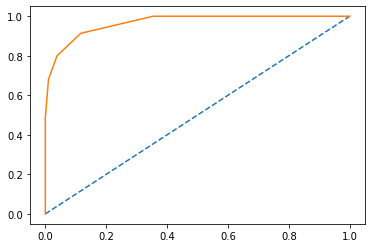

In [146]:
#AUC and ROC for train data wrt KNN with SMOTE
probs = KNNSM.predict_proba(Xtrain_res)
probs = probs[:, 1]
KNNSM_train_auc = roc_auc_score(Ytrain_res, probs)
print('AUC: %.3f' % KNNSM_train_auc)
train_fpr, train_tpr, train_thresholds = roc_curve(Ytrain_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);

In [147]:
## Performance Matrix on test data set
KNNSM_Ytest_predict = KNNSM.predict(Xtest)
KNNSM_test_score = KNNSM.score(Xtest, Ytest)
print(KNNSM_test_score)
print(metrics.confusion_matrix(Ytest, KNNSM_Ytest_predict))
print(metrics.classification_report(Ytest, KNNSM_Ytest_predict))

0.743421052631579
[[116  37]
 [ 80 223]]
              precision    recall  f1-score   support

           0       0.59      0.76      0.66       153
           1       0.86      0.74      0.79       303

    accuracy                           0.74       456
   macro avg       0.72      0.75      0.73       456
weighted avg       0.77      0.74      0.75       456



AUC: 0.788


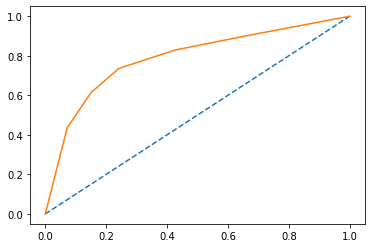

In [148]:
#AUC and ROC for test data wrt KNN with SMOTE
probs = KNNSM.predict_proba(Xtest)
probs = probs[:, 1]
KNNSM_test_auc = roc_auc_score(Ytest, probs)
print('AUC: %.3f' % KNNSM_test_auc)
test_fpr, test_tpr, test_thresholds = roc_curve(Ytest, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);

In [149]:
# KNN with SMOTE[0]
KNNSM_metrics1=classification_report(Ytrain_res, KNNSM_Ytrain_predict,output_dict=True)
data1=pd.DataFrame(KNNSM_metrics1).transpose()
KNNSM_train_f1score0=round(data1.loc["0"][2],2)
KNNSM_train_recall0=round(data1.loc["0"][1],2)
KNNSM_train_precision0=round(data1.loc["0"][0],2)
print ('KNNSM_train_precision ',KNNSM_train_precision0)
print ('KNNSM_train_recall ',KNNSM_train_recall0)
print ('KNNSM_train_f1 ',KNNSM_train_f1score0)

KNNSM_metrics2=classification_report(Ytest, KNNSM_Ytest_predict,output_dict=True)
data2=pd.DataFrame(KNNSM_metrics2).transpose()
KNNSM_test_f1score0=round(data2.loc["0"][2],2)
KNNSM_test_recall0=round(data2.loc["0"][1],2)
KNNSM_test_precision0=round(data2.loc["0"][0],2)
print ('KNNSM_test_precision ',KNNSM_test_precision0)
print ('KNNSM_test_recall ',KNNSM_test_recall0)
print ('KNNSM_test_f1 ',KNNSM_test_f1score0)

# KNN with SMOTE[1]
KNNSM_metrics3=classification_report(Ytrain_res, KNNSM_Ytrain_predict,output_dict=True)
data3=pd.DataFrame(KNNSM_metrics3).transpose()
KNNSM_train_f1score1=round(data3.loc["1"][2],2)
KNNSM_train_recall1=round(data3.loc["1"][1],2)
KNNSM_train_precision1=round(data3.loc["1"][0],2)
print ('KNNSM_train_precision ',KNNSM_train_precision1)
print ('KNNSM_train_recall ',KNNSM_train_recall1)
print ('KNNSM_train_f1 ',KNNSM_train_f1score1)

KNNSM_metrics4=classification_report(Ytest, KNNSM_Ytest_predict,output_dict=True)
data4=pd.DataFrame(KNNSM_metrics4).transpose()
KNNSM_test_f1score1=round(data4.loc["1"][2],2)
KNNSM_test_recall1=round(data4.loc["1"][1],2)
KNNSM_test_precision1=round(data4.loc["1"][0],2)
print ('KNNSM_test_precision ',KNNSM_test_precision1)
print ('KNNSM_test_recall ',KNNSM_test_recall1)
print ('KNNSM_test_f1 ',KNNSM_test_f1score1)


KNNSM_train_precision  0.83
KNNSM_train_recall  0.96
KNNSM_train_f1  0.89
KNNSM_test_precision  0.59
KNNSM_test_recall  0.76
KNNSM_test_f1  0.66
KNNSM_train_precision  0.95
KNNSM_train_recall  0.8
KNNSM_train_f1  0.87
KNNSM_test_precision  0.86
KNNSM_test_recall  0.74
KNNSM_test_f1  0.79


## Comparison Table

In [150]:
index=['Accuracy', 'AUC', 'Recall for 0','Recall for 1','Precision for 0','Precision for 1','F1 Score for 0','F1 Score for 1']
datatable = pd.DataFrame({
    'LR Train':[model.score(Xtrain, Ytrain),LRbasic_train_auc,lr_train_recall0,lr_train_recall1,lr_train_precision0,lr_train_precision1,lr_train_f1score0,lr_train_f1score1],
    'LR Test':[model.score(Xtest, Ytest),LRbasic_test_auc,lr_test_recall0,lr_test_recall1,lr_test_precision0,lr_test_precision1,lr_test_f1score0,lr_test_f1score1],
    
    'LR BestParameters Train':[LRM_train_score,LR_train_auc,lrm_train_recall0,lrm_train_recall1,lrm_train_precision0,lrm_train_precision1,lrm_train_f1score0,lrm_train_f1score1],
    'LR BestParameters Test':[LRM_test_score,LR_test_auc,lrm_test_recall0,lrm_test_recall1,lrm_test_precision0,lrm_test_precision1,lrm_test_f1score0,lrm_test_f1score1],
    
    'LDA Train':[LDA_train_score,LDA_train_auc,lda_train_recall0,lda_train_recall1,lda_train_precision0,lda_train_precision1,lda_train_f1score0,lda_train_f1score1],
    'LDA Test':[LDA_test_score,LDA_test_auc,lda_test_recall0,lda_test_recall1,lda_test_precision0,lda_test_precision1,lda_test_f1score0,lda_test_f1score1],
    
    'LDA BestParameters Train':[LDAM_train_score,LDAM_train_auc,LDAM_train_recall0,LDAM_train_recall1,LDAM_train_precision0,LDAM_train_precision1,LDAM_train_f1score0,LDAM_train_f1score1],
    'LDAM BestParameters Test':[LDAM_test_score,LDAM_test_auc,LDAM_test_recall0,LDAM_test_recall1,LDAM_test_precision0,LDAM_test_precision1,LDAM_test_f1score0,LDAM_test_f1score1],
    
    'AdaBoost Train':[ADaBo_train_score,ADaBo_train_auc,ADaBo_train_recall0,ADaBo_train_recall1,ADaBo_train_precision0,ADaBo_train_precision1,ADaBo_train_f1score0,ADaBo_train_f1score1],
    'AdaBoost Test':[ADaBo_test_score,ADaBo_test_auc,ADaBo_test_recall0,ADaBo_test_recall1,ADaBo_test_precision0,ADaBo_test_precision1,ADaBo_test_f1score0,ADaBo_test_f1score1],
    
    'GradientBoost Train':[GBo_train_score,GBo_train_auc,GBo_train_recall0,GBo_train_recall1,GBo_train_precision0,GBo_train_precision1,GBo_train_f1score0,GBo_train_f1score1],
    'GradientBoost Test':[GBo_test_score,GBo_test_auc,GBo_test_recall0,GBo_test_recall1,GBo_test_precision0,GBo_test_precision1,GBo_test_f1score0,GBo_test_f1score1],
    
    'Decision Tree Train':[DT_train_score,DT_train_auc,DT_train_recall0,DT_train_recall1,DT_train_precision0,DT_train_precision1,DT_train_f1score0,DT_train_f1score1],
    'Decision Tree Test':[DT_test_score,DT_test_auc,DT_test_recall0,DT_test_recall1,DT_test_precision0,DT_test_precision1,DT_test_f1score0,DT_test_f1score1],
    
    'Random Forest Train':[RF_train_score,RF_train_auc,RF_train_recall0,RF_train_recall1,RF_train_precision0,RF_train_precision1,RF_train_f1score0,RF_train_f1score1],
    'Random Forest Test':[RF_test_score,RF_test_auc,RF_test_recall0,RF_test_recall1,RF_test_precision0,RF_test_precision1,RF_test_f1score0,RF_test_f1score1],
   
    'Random Forest BestParameters Train':[RFM_train_score,RFM_train_auc,RFM_train_recall0,RFM_train_recall1,RFM_train_precision0,RFM_train_precision1,RFM_train_f1score0,RFM_train_f1score1],
    'Random Forest BestParameters Test':[RFM_test_score,RFM_test_auc,RFM_test_recall0,RFM_test_recall1,RFM_test_precision0,RFM_test_precision1,RFM_test_f1score0,RFM_test_f1score1],
    
    'Bagging with Decision Tree Train':[Bag_train_score,Bag_train_auc,Bag_train_recall0,Bag_train_recall1,Bag_train_precision0,Bag_train_precision1,Bag_train_f1score0,Bag_train_f1score1],
    'Bagging with Decision Tree Test':[Bag_test_score,Bag_test_auc,Bag_test_recall0,Bag_test_recall1,Bag_test_precision0,Bag_test_precision1,Bag_test_f1score0,Bag_test_f1score1],
    
    'Bagging with Random Forest Train':[BagRF_train_score,BagRF_train_auc,BagRF_train_recall0,BagRF_train_recall1,BagRF_train_precision0,BagRF_train_precision1,BagRF_train_f1score0,BagRF_train_f1score1],
    'Bagging with Random Forest Test':[BagRF_test_score,BagRF_test_auc,BagRF_test_recall0,BagRF_test_recall1,BagRF_test_precision0,BagRF_test_precision1,BagRF_test_f1score0,BagRF_test_f1score1],
    
    'KNN Train':[KNN_train_score,KNN_train_auc,knn_train_recall0,knn_train_recall1,knn_train_precision0,knn_train_precision1,knn_train_f1score0,knn_train_f1score1],
    'KNN Test':[KNN_test_score,KNN_test_auc,knn_test_recall0,knn_test_recall1,knn_test_precision0,knn_test_precision1,knn_test_f1score0,knn_test_f1score1],
    
    'KNNM BestParameters Train':[KNNM_train_score,KNNM_train_auc,KNNM_train_recall0,KNNM_train_recall1,KNNM_train_precision0,KNNM_train_precision1,KNNM_train_f1score0,KNNM_train_f1score1],
    'KNNM BestParameters Test':[KNNM_test_score,KNNM_test_auc,KNNM_test_recall0,KNNM_test_recall1,KNNM_test_precision0,KNNM_test_precision1,KNNM_test_f1score0,KNNM_test_f1score1],
    
    'KNN with SMOTE Train':[KNNSM_train_score,KNNSM_train_auc,KNNSM_train_recall0,KNNSM_train_recall1,KNNSM_train_precision0,KNNSM_train_precision1,KNNSM_train_f1score0,KNNSM_train_f1score1],
    'KNN with SMOTE Test':[KNNSM_test_score,KNNSM_test_auc,KNNSM_test_recall0,KNNSM_test_recall1,KNNSM_test_precision0,KNNSM_test_precision1,KNNSM_test_f1score0,KNNSM_test_f1score1],
    
    'Naive Bayes Train':[NB_train_score,NB_train_auc,NB_train_recall0,NB_train_recall1,NB_train_precision0,NB_train_precision1,NB_train_f1score0,NB_train_f1score1],
    'Naive Bayes Test':[NB_test_score,NB_test_auc,NB_test_recall0,NB_test_recall1,NB_test_precision0,NB_test_precision1,NB_test_f1score0,NB_test_f1score1],
    
    'Naive Bayes BestParameters Train':[NBM_train_score,NBM_train_auc,NBM_train_recall0,NBM_train_recall1,NBM_train_precision0,NBM_train_precision1,NBM_train_f1score0,NBM_train_f1score1],
    'Naive Bayes BestParameters Test':[NBM_test_score,NBM_test_auc,NBM_test_recall0,NBM_test_recall1,NBM_test_precision0,NBM_test_precision1,NBM_test_f1score0,NBM_test_f1score1],
    
    'Naive Bayes with SMOTE Train':[NBSM_train_score,NBSM_train_auc,NBSM_train_recall0,NBSM_train_recall1,NBSM_train_precision0,NBSM_train_precision1,NBSM_train_f1score0,NBSM_train_f1score1],
    'Naive Bayes with SMOTE Test':[NBSM_test_score,NBSM_test_auc,NBSM_test_recall0,NBSM_test_recall1,NBSM_test_precision0,NBSM_test_precision1,NBSM_test_f1score0,NBSM_test_f1score1],
    
    
},index=index)
round(datatable.T,2)

,Accuracy,AUC,Recall for 0,Recall for 1,Precision for 0,Precision for 1,F1 Score for 0,F1 Score for 1
LR Train,0.85,0.90,0.68,0.92,0.77,0.87,0.72,0.90
LR Test,0.82,0.87,0.68,0.90,0.77,0.85,0.72,0.87
LR BestParameters Train,0.85,0.90,0.68,0.92,0.77,0.87,0.72,0.90
LR BestParameters Test,0.82,0.87,0.68,0.90,0.77,0.85,0.72,0.87
LDA Train,0.84,0.90,0.70,0.90,0.74,0.88,0.72,0.89
LDA Test,0.82,0.88,0.70,0.88,0.75,0.85,0.72,0.87
LDA BestParameters Train,0.84,0.90,0.70,0.90,0.74,0.88,0.72,0.89
LDAM BestParameters Test,0.82,0.88,0.70,0.88,0.75,0.85,0.72,0.87
AdaBoost Train,0.85,0.91,0.69,0.91,0.76,0.88,0.72,0.89
AdaBoost Test,0.81,0.88,0.65,0.89,0.76,0.84,0.70,0.86


## Cross-Validation on Naive Bayes

In [151]:
# Train Set
from sklearn.model_selection import cross_val_score
scores = cross_val_score(NBSM, Xtrain_res, Ytrain_res, cv=10)
scores

array([0.7615894 , 0.83443709, 0.80794702, 0.74172185, 0.83443709,
       0.84768212, 0.78145695, 0.8410596 , 0.74666667, 0.80666667])

In [152]:
# Test Set
scores = cross_val_score(NBSM, Xtest, Ytest, cv=10)
scores

array([0.76086957, 0.73913043, 0.80434783, 0.76086957, 0.84782609,
       0.86956522, 0.77777778, 0.82222222, 0.68888889, 0.71111111])

## Cross-Validation on KNN

In [153]:
# Train Set
scores = cross_val_score(KNNSM, Xtrain_res, Ytrain_res, cv=10)
scores

array([0.78807947, 0.82781457, 0.84768212, 0.77483444, 0.88741722,
       0.86092715, 0.86754967, 0.85430464, 0.81333333, 0.81333333])

In [155]:
# Test Set
scores = cross_val_score(KNNSM, Xtest, Ytest, cv=10)
scores

array([0.84782609, 0.7173913 , 0.73913043, 0.7826087 , 0.76086957,
       0.84782609, 0.71111111, 0.84444444, 0.71111111, 0.73333333])

## 2.

In [156]:
import re
import nltk
import string

nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
rv = inaugural.raw('1941-Roosevelt.txt')
ken = inaugural.raw('1961-Kennedy.txt')
nix = inaugural.raw('1973-Nixon.txt')

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\aaditya.d\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


### Count of Sentences, Words and Characters 

In [157]:
print('1941-Roosevelt.txt')
print('Total sentences:-',len(inaugural.sents('1941-Roosevelt.txt')),'\tTotal words:-',len(inaugural.words('1941-Roosevelt.txt')),'\tTotal characters :-',len(rv))
print('\n')
('1961-Kennedy.txt')
print('Total sentences:-',len(inaugural.sents('1961-Kennedy.txt')),'\tTotal words:-',len(inaugural.words('1961-Kennedy.txt')),'\tTotal characters :-',len(ken))
print('\n')
print('1973-Nixon.txt')
print('Total sentences:-',len(inaugural.sents('1973-Nixon.txt')),'\tTotal words:-',len(inaugural.words('1973-Nixon.txt')),'\tTotal characters :-',len(nix))

1941-Roosevelt.txt
Total sentences:- 68 	Total words:- 1536 	Total characters :- 7571


Total sentences:- 52 	Total words:- 1546 	Total characters :- 7618


1973-Nixon.txt
Total sentences:- 69 	Total words:- 2028 	Total characters :- 9991


### Cleaning

In [158]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)
from nltk.tokenize import word_tokenize
rv_tokens = word_tokenize(rv)
ken_tokens = word_tokenize(ken)
nix_tokens = word_tokenize(nix)

rv_clean = [word for word in (x.lower() for x in rv_tokens) if word not in stopwords]
ken_clean = [word for word in (x.lower() for x in ken_tokens) if word not in stopwords]
nix_clean = [word for word in (x.lower() for x in nix_tokens) if word not in stopwords]
print(rv_clean)
print('\n\n')
print(ken_clean)
print('\n\n')
print(nix_clean)


['national', 'day', 'inauguration', 'since', '1789', 'people', 'renewed', 'sense', 'dedication', 'united', 'states', 'washington', "'s", 'day', 'task', 'people', 'create', 'weld', 'together', 'nation', 'lincoln', "'s", 'day', 'task', 'people', 'preserve', 'nation', 'disruption', 'within', 'day', 'task', 'people', 'save', 'nation', 'institutions', 'disruption', 'without', 'us', 'come', 'time', 'midst', 'swift', 'happenings', 'pause', 'moment', 'take', 'stock', '--', 'recall', 'place', 'history', 'rediscover', 'may', 'risk', 'real', 'peril', 'inaction', 'lives', 'nations', 'determined', 'count', 'years', 'lifetime', 'human', 'spirit', 'life', 'man', 'three-score', 'years', 'ten', 'little', 'little', 'less', 'life', 'nation', 'fullness', 'measure', 'live', 'men', 'doubt', 'men', 'believe', 'democracy', 'form', 'government', 'frame', 'life', 'limited', 'measured', 'kind', 'mystical', 'artificial', 'fate', 'unexplained', 'reason', 'tyranny', 'slavery', 'become', 'surging', 'wave', 'future',

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aaditya.d\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [159]:
rv_para = ' '.join([str(elem) for elem in rv_clean])
ken_para = ' '.join([str(elem) for elem in ken_clean])
nix_para = ' '.join([str(elem) for elem in nix_clean])
rv_ultra_clean = rv_para.replace('[^\w\s]','').replace('--','')
ken_ultra_clean = ken_para.replace('[^\w\s]','').replace('--','')
nix_ultra_clean = nix_para.replace('[^\w\s]','').replace('--','')

## Stemming

In [160]:
from nltk.stem import PorterStemmer
st = PorterStemmer()

rv_stem= " ".join([st.stem(word) for word in rv_ultra_clean.split()])
ken_stem= " ".join([st.stem(word) for word in ken_ultra_clean.split()])
nix_stem= " ".join([st.stem(word) for word in nix_ultra_clean.split()])

print(rv_stem)
print('\n\n')
print(ken_stem)
print('\n\n')
print(nix_stem)


nation day inaugur sinc 1789 peopl renew sens dedic unit state washington 's day task peopl creat weld togeth nation lincoln 's day task peopl preserv nation disrupt within day task peopl save nation institut disrupt without us come time midst swift happen paus moment take stock recal place histori rediscov may risk real peril inact live nation determin count year lifetim human spirit life man three-scor year ten littl littl less life nation full measur live men doubt men believ democraci form govern frame life limit measur kind mystic artifici fate unexplain reason tyranni slaveri becom surg wave futur freedom eb tide american know true eight year ago life republ seem frozen fatalist terror prove true midst shock act act quickli boldli decis later year live year fruit year peopl democraci brought us greater secur hope better understand life 's ideal measur materi thing vital present futur experi democraci success surviv crisi home put away mani evil thing built new structur endur line

## Most Frequent Words

In [161]:
from nltk.probability import FreqDist
from collections import Counter 

rv_freq = nltk.FreqDist(rv_stem)
ken_freq = nltk.FreqDist(ken_stem)
nix_freq = nltk.FreqDist(nix_stem)

Count_rv = Counter(rv_stem.split())
Count_ken = Counter(ken_stem.split())
Count_nix = Counter(nix_stem.split()) 

rv_MOW = Count_rv.most_common(3)
ken_MOW = Count_ken.most_common(3)
nix_MOW = Count_nix.most_common(3)
print(rv_MOW)
print(ken_MOW)
print(nix_MOW)

[('nation', 17), ('know', 10), ('peopl', 9)]
[('let', 16), ('us', 12), ('power', 9)]
[('us', 26), ('let', 22), ('america', 21)]


### Word Cloud

In [162]:
from wordcloud import WordCloud

In [163]:
rv_string = ' '.join([str(elem) for elem in Count_rv])
ken_string = ' '.join([str(elem) for elem in Count_ken])
nix_string = ' '.join([str(elem) for elem in Count_nix])
rv_fin = rv_string.replace('[^\w\s]','')
ken_fin = ken_string.replace('[^\w\s]','')
nix_fin = nix_string.replace('[^\w\s]','')

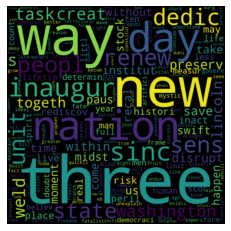

<Figure size 720x720 with 0 Axes>

In [164]:
wordcloud = WordCloud(width = 1000, height = 1000,min_font_size = 10).generate(rv_fin)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=(10,10))
plt.show()

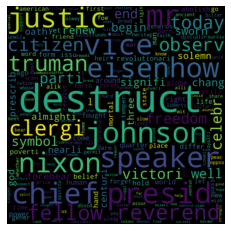

<Figure size 720x720 with 0 Axes>

In [165]:
wordcloud = WordCloud(width = 1000, height = 1000,min_font_size = 10).generate(ken_fin)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=(10,10))
plt.show()

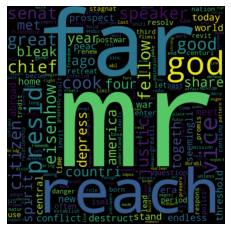

<Figure size 720x720 with 0 Axes>

In [166]:
wordcloud = WordCloud(width = 1000, height = 1000,min_font_size = 10).generate(nix_fin)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=(10,10))
plt.show()